# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

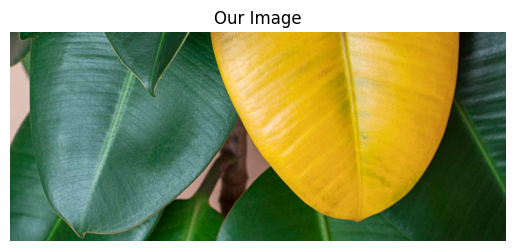

In [49]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img23 = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img23)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [50]:
import base64
with open("/content/filetoup.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgBGQH0AwEiAAIRAQMRAf/EADYAAAEFAQEBAQAAAAAAAAAAAAUCAwQGBwEACAkBAAEF

(np.float64(-0.5), np.float64(499.5), np.float64(280.5), np.float64(-0.5))

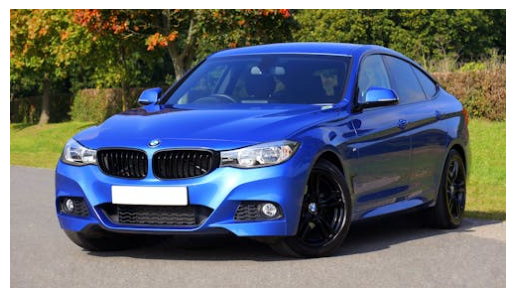

In [51]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = """/9j/4AAQSkZJRgABAQEASABIAAD/4gIcSUNDX1BST0ZJTEUAAQEAAAIMbGNtcwIQAABtbnRyUkdCIFhZWiAH3AABABkAAwApADlhY3NwQVBQTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWxjbXMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAAF5jcHJ0AAABXAAAAAt3dHB0AAABaAAAABRia3B0AAABfAAAABRyWFlaAAABkAAAABRnWFlaAAABpAAAABRiWFlaAAABuAAAABRyVFJDAAABzAAAAEBnVFJDAAABzAAAAEBiVFJDAAABzAAAAEBkZXNjAAAAAAAAAANjMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB0ZXh0AAAAAElYAABYWVogAAAAAAAA9tYAAQAAAADTLVhZWiAAAAAAAAADFgAAAzMAAAKkWFlaIAAAAAAAAG+iAAA49QAAA5BYWVogAAAAAAAAYpkAALeFAAAY2lhZWiAAAAAAAAAkoAAAD4QAALbPY3VydgAAAAAAAAAaAAAAywHJA2MFkghrC/YQPxVRGzQh8SmQMhg7kkYFUXdd7WtwegWJsZp8rGm/fdPD6TD////bAIQABQYGBwkHCgsLCg0ODQ4NExIQEBITHRUWFRYVHSsbIBsbIBsrJi4mIyYuJkQ2MDA2RE9CP0JPX1VVX3hyeJyc0gEFBgYHCQcKCwsKDQ4NDg0TEhAQEhMdFRYVFhUdKxsgGxsgGysmLiYjJi4mRDYwMDZET0I/Qk9fVVVfeHJ4nJzS/8IAEQgBGQH0AwEiAAIRAQMRAf/EADYAAAEFAQEBAQAAAAAAAAAAAAUCAwQGBwEACAkBAAEFAQEAAAAAAAAAAAAAAAEAAgMEBQYH/9oADAMBAAIQAxAAAACvwZYvzbfXfvSKdgAJmcnoQ5FftDonUwoEvcQqb2Rtc9TZZbt3NFTjNTlpIYbasws32gT5W3QAOLVZI2o5vaYmyDFQDVZLbTppOYxJg0k0+aqUG0NHh5maZLpYOnEnWb5c69OwM0hAhz4JCg2m2chpQRy5EFFWR/QA9/qY4qhe89JXDfBkUjlyiSAglZgNUOwPgkY8YhXMylCiN5oMddaHotsvgnkvocfHzLj9vewcWq17ui5I0Q0M0xcq/acu3BrI3lqhWSFroGreg6rlkKdtrrZwZPWGxZehyV80e+iKNR0KZW9ty6eKzmWqbJn8ruox4lSotmsthtbTeM/qyBIFgToCsSJsOaIefiWONPWiLOxpJ7roum6bVbLDkFJvzdUtRlay0NutuaKmtwv4uxSsmTPWb2i02oD7GRsNExrICDqmXHM3oz1SdIuUNohFeBnmfWVswO9DeH3JuZEBF2pZ7jQr3VBQLY3cqzRy4yJdq1l+tyN6svvIMyQiQRmIDdMei1regSsoQbBWcqDfzLVACG677RE7INWsmr6T6+llEzTB+myqTSbGjTjkh7d6KyyqbyVt/TQ1EXztF8Ve41T8kahRQ4fNTJnYdtvLNOewbdcEaAP5WyDNjhePdHwjCbcUQfoVUlfThlurWhDBI9JlsIFtEOCTIvHvWW/RIqkjOD0L41nBS3UbseXl9FuswapVqVg7XZ7GtVivpOAyK1cEVHh1qGXowL/mbzVMjlWW3ZIy2w2KZdwxS9VmWXg70bnvQyQ2UR2WGk+WxeA+fLUFN28SV2MWrThMTDSx8tMdyI9R1hjnrODLabL+fDkchq4k0U8MCDr9qKoWD1c5nSMKsr3CbcGZZRTJsNibTZHw4ea1GVRfQeW1F+ag+0LxfmlCjTVkxYZ0JZjLKq7Mkmh0ERIeCvbSHY08WDXnEmlprAerKgAlPQQQmJY+/EIOLkWDO0uow7cci5Ns9/geUqBC2ShlkPCL91srixSA9c0WRhfEhEhTHd5ziUkzWzdV7omw1+Izn/Qt2PZZwuRSqLiuO264iYILySyXY/Syo3x7MOX3NrAV8l571RuDLrkcs5ocWYwzAg8fIV9XfSQ4oEOw9rEDTV9eybCNV0PjkoJBN0jQIc3k75sLJjR3XMuuVA2YB6yAO3UsOq08/wCo8rXs/wBGymtZI6Axotmpn44vAsMiOzmmkhSyzrHgX3J1Z9aataHPqsmeJY5qM6lpa4vjSmU0/G4zW5z7XFqTfqBsxfQx6iWAZcoFDH6UaLJnWgYeqWfgyq7mwNhRchdkyZkUlbluiPKeufiTJORICsY2Ndtk/BPNkwU8GJ7XOyg1l9E9NN+kvmqcRrZWtAbFpvZ0XlJ1cQltnOx1h0P0DKzOp7g9sR5TaLcx0lCv0TaSOjVw63aZGlgo8yxx9CqESVYmYOjk2pEJbLyZACRbG4zUXjsckCKsoZzxiJXXSPXWhyM6Y1RbMzVkpdT1Yfh3ahZbySoPoxC9krMdRMnBlyFcwd63XNrp9bpT67zC5tZ+xUKtyuL3ZZJyBxegQaS9LPH9avNVBGbi5n5+MXTQeumA0jU/VWUI2e9ViSBKv9hRAjLdWPTcyezX2PRsKy8rXntuMWtwmk9CDN2kUYHNyme1EWS4tKwpU0K21tp9U2mq1Ray28mhrTrnx5XYkbifKojPmLyWLplz02ObmZFmkVi3DY5r1ZcoJRDQI1JHZsl2qAyYHFgpJNGZZ+jQ5G7U/kl93c/jQIvw25ujfeeUWocQ409sD0zzVIWFXC0pCYSWrdbiEkLDTbb3NagjdUA+xYucBbdkPRUramgphlv3KWUlYfKRdVfWrlA1jOacgzyWrckj0aQ16vE4k0cVB0rYq0xGn2inbwpH0m7l2vngntqaUmI0v6hwjntHOIRMT1tCVec6TTfpJfI5mWZaB1xrzV/rQKIlo4XrHHIMeRC9LJSZBKBk2btSamGyAaaOxWLBPoLCm3ZLa/MnrShYHPd8jH86nVtuo5yBOJWyDTNOw457dzs3T8KsNKxefhP6++WI3RhFjrVSeehiek39b/IesamdnQZqXl6KutrRaeWRCgPskXDW/pb5ButmL6Tt/wAn/T0TnHaRmbTe4dRa0auy/J71f6esJjTfbNWHRjULzXcDX2tJrPsSbkPtwhHiimiDMcVWerqXK7vOIdidxLrDEml2Cu2wi/Vo9nyfSkscR83DC18bIr3PETuKV6s7nfcS9VrTTZWU20Yya9h43XxUuaMsZRbDPU/yqP8ArOqcpt4oO1UfSu0vU07Ho5fxjL+qMjx9LMX9DnKTPGdr0B1b572beTzKSLKCuNWGq1DWKkZK7Ir9K6HOu1Ardb6mvGrywNnVfEKCcFt19yO3yWnYOCjb1d2mOxMfXMlkilG5TXgFFBUJXLiORveGOw5YgSIbUoRouSbpnv3N9a/OVBeeHGJfveJL9731KzzvOgeqNup9qPFUjmPT+dsP0J8q6rFUmUrbsq6LNI/Xfx/92cP0lTYufuS0aT67ecyjevPiKVItvmu+WRsWvel8kdLCb1byL9dwvz9wu/Lzc/O9Cyqmu9y3xZ5E1CtvdlVZtFYyuhiBbDRvN96LDmuZtiHba0cSMW2j3ljikelwNGK6hwEp8brJV5hfJ8gVJ5UTsesqLa6aTkbE3fEt5zZdQWh/z+4j0tKZzzfkpi0c9Mhe4ytJ2h3kDYZ8ifWXzoY0KtEPQH2n6Jw4jROtxvfTPxyU43a+xyHxBKqyfbk74nkA/bDnxA6F9wOfC6StLBVEbuUPoT6R/OvRL+R9A/NcgZ0RbBWGXyOzVbDOtGXYtmefS2c2IcgHJR1+f2uzRPF6tnp1xoEKbmwrfE9dgCWRygkYs7VrrnvD7sE2bSa89uvVvJ4tKWzv0uTj3JsyG/Xc39J/N2x58m+O5NL5O5pPsyeiGjeonkdHX5ffVW+SGwm+L4V87itWzb0nEgJMVvWolns1m83oEbDE5WfT3LeuhILcItBzDr62CK5KUnRapfGS05XYh3os2D4hftrNymN9Gwc8YFN1qvW3VVicDfajhSI3Hu18TMb4rUjsyhsRL3ih3iQFK4FAMfZooP00cllPYXe4taMf0roURyR5JwnClNNiJs3EoA5sFuhf87S/pwvXk+fffQnqc1a63zShkea6EryuJN4bucFL5UqutZFLHHhIYcxT0XhBRQjiJl0EtwNKDOuRZwP1IsoI2UcbDJQKsQPNO0W35q9o5+9CsakXGaOPqC4bJ6OMi05mUSGqcjLjk14mTosWN8OJPkFotw5NKrj1pJOFOma7bGOwQl9KGY3/AD7Zdi6x+eW0k8xwwn6Q0zSFeSx1qcqjgNo8B80jVtuWIuIdQE7xK0mm5CmkfjG4xgfi8d9ph5ofj/n17wr5E79chEvmPn0YPcMDRvLCGF82xkrFU7GhDH+a7xLJO6s6lkftecRx3mujXDMpOiyEs89pjoOQL2iQlicreTrT8zS/qSwpfJti+qXUfm+y7alrsytFnbY6Oie2wsrV4pC3PJc71JC/e4knvkEKZkJRZ8/4ta4lwO6tSQudc8glrikUPcUC2lzySe9WE1yQgJLcppFl1SkONTGUmluKSjceUizyS2kz6T1KLyWlKP19SDHHFlMrVwHvUOJcR5RTau8QUlvxTjalJNe91JCuvoQn2niucUtJpx5CTXVKIZbXHRc8vxEN5LIMh+I8gvykA9Q6lJaXfAp61JQR1CEXW/OhKZeYSd51pJXuPJceRwh1hxoLiXPI+cgyUVNPtIeUzJS6hKUusu8RcYdaIdQptJS4ryTnOOI+4rqCGJCCEKdaScjSoaTikOpKaRwiVxDgMdxLBT3kejP/xAAzEAACAgIBAwMDAwQCAgIDAAABAgADBBESBRMhIjFBEBQyBhVRFiAjQgdSJDMwQzRhcf/aAAgBAQABCAE4y7Zns+5tbQrTJr9Nila5k5ulKKKsi562ey21FaMHWo1v2k8ymqng5XHxqKwROo47UsRMdd2ry5iseVzSWJjhTUrlrUGod2WcR4Xe8S6rtpxXtVZBcW5NjWEsDfUBrpl/PiDl5A7nnDtLEB85n74tIVrbSi475lBsWtb/APK3cTNre7m12TirUQn7t2Ur7d/UFNa8sXMN+9nFa1nC4+HYqgFq/QpNbIWVnryPuGcznWFAjXqU5C3gdCKLyLFmTQeTBWQswWJ0/wAabLbVIRbNc+JqSoVlYidtHZ7szlrhmXi3wMbCsrRWKu7IFD4NyWsDUcdscS28qvMU5dbn1ZAQg9v8OQKuA4M7n8Bj4dx1Eit1RaGCISeIpbuZCUg1sy9QvUqinqoFoZlzMZ93rc3K0MSpqWuyxrWssDzOD7DSil6+LHqAZ2MxOk9xXeIEO1ZuyfE+3sEI9Mx/ySW5Ngu5Q5FArQDFXv31q2K+TzZZlO3prsx72Us0OWBXqV5PdPI4zvz4Ln1VcVAREZhybmVnn3it3rgbHPBisw8nsWh1x84WV8mYhmdWUCwae1DVjp2aAblaCusoO9dlIHFa1ZNh9bW5rJbta8yyz3yMpQuo1OG6APl4vZYax8ex1Kw445ajVDt8C12NzqEy+9XcAO9fxMxrVKFnOQfAP3VIUbe3/KeIvZfa5FsLOfQG8635gBpSyu37VKUZpgv/AOLxTMsF9gprvsajGOqbU7v+XIwFezkiYlWNjcSWsrxgXdjfS7lLGRo9pGiwvIJZhmVigPY/UKjzRsYKjcnOUFt9FmWzOSFZn5SoAe2PTlsxaq0Wd1w/RMU9y2yZRahOJdOWJ3VFZ2Zlhm7crrJXjKsEsgZrKb6UZjaKg7Rk86BTR4weAdFTqJUr1cpiY9hG2NCcQZh19qt+9lWJYa4lYSk1yyvNFQacb3sAmRmEOqS5waltXCt5ZBdjlegmPdSahvt0lucyOnbd2pppzAfGRc9jhRVjiqhrGqyGF3llxrE8dixqjq5Sp4wZf+HiL8mjtjh3WB2bHLHc4+jc8fGVnc0tDJfZy89PyKqUCvbmg2u6tmXWhdrh7UGdMbH7Dmx81eZK5ucbRoYYWtgLGrqv7lr3e/pGmJBLN7EWY5TlZblPYBxLKfy6f0VbBux8KtKu0mT0ytCXmTbRRheFKs3jDRqcK4xKmd7CErrShBBi09vmSaQqstgqBqBS/H7HKc+64WZFFYtOr6lTjNVixeWxzMZVK7nT7VQsDTu08mqQLyn3D2txa6k8+bWLV8/duqTvqoZp33NT2qbzY0xbArETb8SDTaDwRnasKFjOXb03UOXQIlXFWY3I1n/twcWgFxOzjzJNfMPLhz5NK6d1lyGHGDHJ2T9vWByZuPgroTMsRrjwqRu725kZhVeDcALm3XgXdlnFOMz461jHw+3UzQ1ub+QOGK7ktLIv3L2NdlMMraXZJFq7a7SlYoq7LE/l7MJuYWU9+KxXN6uXyV4v1SpqbELCVMPGrM5u2EOI7JZqFn4agrTwJfWzksFsqs2LbQ5VEqxenZgsDxuhWOxJq6CqoQ46Bh/7Do3Sh714HS6/YY/TAYn2KfiThGBsLYMLYROz/wCBLKOm2DTN0vpDAifsvTAPSekY6+Fp6EnLa/tOWugF6ZfXknuHEprUcrWCWcaxvY7bMLq3RmoNXmJko5RbHubsoFyMe2zi0RNjUZeJ4waE8uABq7QQvVYh3ARMjHpUcUwkSotcb7DbcxNvNSIcy80gijqNAfxdTpKpbR6155Nr12osOctYcniXckkbTcrRfVEAJYRAQziUY3P3yaCj6guvChQxJ9y3HUK8huVVHkSX8tMWtmU6eg2VeMfEvbQFfT8ZfyDY6fi2bDmLDl1Q5dE+7x595jT7zFn3mJPusOfcYU72FBbhz/B8AKfY1XeNNa29Sn4JN1n+rZWUg3E6u6j1jI6dktsXYTqdhaqu53GuZ/RZMnI0bqW6bYRUAb8dn56x+ljgvLNxjTviroCRLE4n0pUy+sYV9bntzq+Nc1yhTg5DeRwqYenIouALLXiNTa7wrSzsjtZi96wJhgvkKRkdSCAUnqZvrbmXIJ05BXkSSw1rtkyrHqFDOU5cmcKvddmhCKAQbnNvr8EbicA8yOJf09OO1ZTkcuB1RWfaLh/b0uz4/O5laM7RiISsLLOSzYjsupuCFlnOcxOQnITazYnicPIBXyQJjANtoWn5AiVt4l+Lj2/mMfKp80G6m5wtopWpgJlUVNkbU49aemvFwVV+UvxVLamRiM1yov7VkODxu6JkIyE09LK6VcfCStzM2pzzIxa76KVSNlNTkI0zMw3APP3bL5bmR1Bwmgr698GnuWgTKoY5Ieb5WHkiU8rJXkVa01HCzI1Y1HkzFrS9CG7Q2WXJr1p5yeyvjMlLF4qyWeCCSQYW2ZgWEX6GWnIbFBFSrY2PjNkEWXPZ4mmJnDfgN6j4YwGdOxqrlZrOpYQqbkg95jY1LKeWZjpXor9QCYEJnCGV+Ss5a2ZijjSghEXxLfTYZygMyMeq1fWe/hfkDjZPYesis2NqoTLchpT01nyAzIFrTimKoB8hz+EVWrsUm9vJE5qdw/ZV8jFxu6/JXxjWRGr8elbAMYpMNjXZyFvVOSequ13tYpezaEQ8EDDEXFX8+ZUKJYldWPuWHG7RJvPIeKneszl3H9bIVUkfExERn9VVAGTTw6oaMf0zFxmubu2u8YEe4u0fNlvo8FeFJnuYYmRan4vl3svFuUW2wL4e129/qLCJxLIGHZPubBpzKYx9YE14EHtFl/4gxTBBKz/qb8W7Ec342F1YXqpWrKbusssyy7mKzh9FrrLA8D/+Rpa7WNgELgHavbvfPevxC2uCDh2cW4M+UQ/qpNdtpjKAx0/Mbg0PfCZhcIVo7Y5lqeOhTkL3K1TqWRkIyifdJWgVbbMmujgL39td8eAuRtmEYO3uMazyZUzVk6NyVjuTGoa9+7azxVJlwM16tisc7NzLs/1iEDzHPj6mY43uXKB5H9lBJQicuI2bHDvuUj0wuPuK5udxV8QOCY67VhKzB9CdENAZnYq4+QtyfcLsdxaim9W1oQSVrZOWuC8g9uK6lnVHcCziWNezrtGwkm4GpVjWP5aNax8SiwpvQ3x2TrUKTGsatjMHHBDMyV1IvBawm5b5tLy9SE2LGdWYHKCkbg4iomYGObmYtVjLr09Z549StFUJ/ksx6WybC7/wBaprIncaFzArlfFNFgTxcloc8tDxCPGpo/TRPsr8V0CxP9tTaYS0rwIggGllnmwCUpulDP2+lfd8WmW1lR6abS21KmDzO3sRNgaOaBbxri0VPSqM3eQFp3EAbXfBXkXsrICueKcyhxeGRzm+BJPfr/3tap3hQanj43HHojDxCfiVDyZSoSpAXsBQQcB5j7KzLs4njLd1kqbTzrRh6STMfP6dRWlbL1jB5AJ1fMw7O2rKHyLfI4ooVcbFSuhXOb5t8LWPn0wuIw/gX2a4mxR8LjKygz7RJ9jXLscVkaKGaM0Zr6BWMFNphosHvRS7NuZBQJ4qI+6XliZWPVarNd+pMEMRP6j6f55WfqHp59q+oo96Mib1A6id3+AHLbi4535FZgUyzGVSXjFT6AKyldYHg7ljunHjXYHLMzVqYI2tKJjVpZa8sUByJfSy1ib8T5nTFrN2n4tpNOu9NG9iAx4LMiyzvebbN+C6p9rVGo35akVKNNSlYG0yK6ft7BGpZgJjJdWxIX7houNkGfY3z7G6fY3Q4N0OBdP2+2ft9sGA3y2A3x9jZBgtHxde5CCclnP+FycpfbH6xiV0jvdQ64l9YRDkWaOj3Pd7H20x8Rr9mL0dflek0CJ0ygSrCrU7ApX5AUQagdRDkVqPPencj5NKD1U9l9S6vJNzFFtr4NCm0CBCiDgCzeIqjQmODZaolJ413zGxjZkIh6tiV/b7E4kzpl1wcVRE8HdvBvE0ysFF7r2zvGwL8h+UHRsP5PRcffj9oo1G6QhHpXo1Y916bhLBXir7fca9jlGHKMOSYckw5BhyDPuDO80XvNOzb89uyGrJn2tp/J8Skfky449tj49UFB3udgfPZAnOhCdv/m8BcPEU+qqlUHoFRi0iKqiHU3UZyQQ2qI2bUJl9Q2kXNuIAUUZ1vvd096qi5wAW8SrFya0cpb0+5gnIWdrfJbKz6pWlliBhf03FQnddNVRDJV0+9uWundIND9xs7CORVwn9MVfNXQMOuV4GIjeC1XE7LY2/S6XuPSuFxX/JzndndndgsjXRrobYbZ3JznOcoAxgq/kLWILVHt9zDkGNlRstvhrrGnAmCqcEENqKIc5N6Aaww4gb8u2E/DKOSE82D2adO9OMm+6IbDDaZZlKAYuSS3h8h/JPf5H0pi5L+9XT6V8sND2UzqluqlSdHr5XqIfYRUWWYtLDycOjxta1XfFsZWMTFqU8p4hbU5MRADrbEEwCdtP9uevbmxl2RpiAbTO5Oc7kNx1C8LTlNzf01NgTuTuTnOc5wk/TU8TnGvhudj6RUD5esKPbHYkTKz+FpA5oycxZn1lSItoapgqPlNFcL+RyX+Ht/wC3d2fSmJeW5Hs4lZ9bdQVfFb51pn3TyrqVi++PeHUGdScveonTH45Net6BizW/cp5ELrNamlnETY+eSwgGBdSrHDJs5bnFcBzmx8uxoSZubm5ucpiY9mRcK0zOlLj1Kz7m5sTazaz0T/HNJOKziJwnaM7bb1FwshovSsgy3pThfNmBfynrB1NwXOJgZgO1NvTxbkczaoVfLnF34W7/AK/5TO1kmFP++6h7fc2a0pZzPVqaMAM1/EoLhzxPqbZ6f/71E3/Kn3n8mDlOP8ciZ3DDYZ7mFIx8xrvxWZAyPt6zWgHDV+Z+n6auPZv6bkV7Mt6pSp1D1hJ+8JF6xT8p1XEPvj34Np1MfpBV1sXqFFYbdjXdOUxs/pgn7l0ufuXS4M7phM7/AEkid3DDhWU4J/GvF7n4V9D6lYPSn6Tt/wDu/YMGobIqqVTxWystMumr/RMfHAXv9SwUqyiay40x+hh5a3KbrUPKt77LvLLaFafcVihHj9Qc+z3WN77nmbaCu0wY7keVw4KFE7Yhx195fyVO2gayt9zpjoyBwvlRAJ5XwxPjUVdjzqAQf/sb34PmATJuU5iAdUw7mwVNeHn51Xpe7Azsi42Dq+Ll4uNo11bLLLa1rv4k8e0IRX3LYa04pOCh7COidYJ6UbHyMq7KtdreA7W4a051rFFfOwzinZj1p6ApSnumJzFOj+k86vHvyS9PUqrVYjC6njvlBB32byHB4nllLwo8X5dC+QuTXaVoS+6lEDN1PKGRkOUYzULIicjdY7nZBIOxjOLVjg/ArbYgoM+3EFKQIvxubm/abP13/KlrCWl9II8dBf8AxMJS2q1ituN4hPpEDTiYUaAWTiZx+JawrRmliP3Oa053VaR6Gucn109TzlrCJf1Tqz1slmUjV5DTqDBr0cN7QAnlGGmWa9JnTif2rMEHuZYp8RfynD0CFPIEoxrrBYyeO1Lj6UE6KtoS6xGTK/J+ntQmVVZKurVFhx61np2XFfSus34tTV2t1Esxi9QzUH+PIW+xuV1g8ThDUAJknk2oqiGjcxnNd42da+uvrqa+mpoRplNqhoTxrAGTpSs6IurbVlf/AKhE9458+PVAT8gfXkZszqj6xTK7Ub2pMC7jroxDyGp1bpBuXkltFy+luI9W0HN+KgAKhiY7ubEHSq94Tg2VsjkFtaWKPUZ/9SmaAuErA5OJVS19C1t0v9Hu7C3Lowq6xO34lvT8ez826F03cTpeCvsaUX8blEyJkt6o8e0CPaQhY7G5yiWnjo2JzErblSDCfj6efpozRmzANzgYQvwx8zNb8BERfzmTby7U6R/7C0VTx8hvM1t9zzO7/d1j/wDEP0ozba5g5CZH45FfmWWcDK86sjzbXXZLem0mWdIpn7Okx+i0c9vRR05VAmd03pNoJD9ETfgdGWL0WrUr6NQdbxuir4mJiY+MsOdV/rXbyMrXxLNCZGTRV/7LuvYS/jd+oWP4WdUynll1re9kcmama2lVYPy+iP5+lB3SRKh6NxZ2zFpnFZ3UX2J37q05NDGmWf8AKY45OdeXedArOm3ZYB7r4A3yBMYEnQCaA3/b1cf+I0143OMotsptV17iZFK2Lm16aHe50pEtzqK3/YOnT9hwIegYMP6fwp/T+JP6fxZ/T2LP2DGg6JQJm5V1PUcigPm3N7hzKtkzBQ8Ruy9KqyzdQ/UV95K0cWJ2e2Z2TOzHrlwj/TqIA7UQeT9NEzHBapkOG/8Al4zHT0EQaUQ3KI2TqNliHKPwLLmPisaXyEZodQj+XfbgzDpTlkB0WwuZ+mqv8dwLqqiHfDc4+IqKItzKND+3rGhg2E/vSD0q/Uv5/cq50HqCljXMujkstp1Olnj1DG/+L9QHj1/IEVpWsw8fk0rAQTq/UXzbe1WlCqIKxFxjBiD5OMgEvqTUyPeNFXzLrTYdsPeW9vxxUa98Fh9zWSy9q8iO3bB0+STDY5nBjFx2M+2VF5MtibAC21INmzP+IjhvbIbSNH/1i2Mr2iYlQLOW/S6f+PaRYh9yAIRv2KTs79/7Nz9QDfTLtUY/L1CvCoyel1U1FKzqVHtsOJ6xjLhrbbmfqHkx7VPW8lL0slf/ACYf9l/5Lxv9h/yTgfI/5H6bF/5E6SYP+QujQf8AIHRYP190Sf190Sde69j5XVmyKU65UD5w+tYDkA4gTtgr+ouscAcet2gRmOgVt2dMjrveNhZFvb0P01kp4OTkdSw7u1e9nLzDLXApeYOF9xeFnVuljDakhmPGePlLWAKrk2Gxg5b1ARcYQUgQCuBbPhsYPrmmPUnsWqrGzf1bGAIAuZm0Mh6RUESz2l2uO5Vy0dfpkMuG5hBPuVbYjIfeeOMDP9PP9nUK+5h3JKONI0x6hYKTWr+FEZviYLJarY9j4wS16rbaGRyspQhG2alHuuM0XFeHFefbPPtLdQYlpn2tphxbB4ltJDahTxOi2ZOIrXCxyxJJin3UK3nUd9PMTqDY99Dy/LpvZbK/1W2KwoqrX2hmUf8AGBMS1qnLTqmcMtQwMQbdYlSfcOJkJxTHg2AsNx3oJjufL86qxH6jjrH6x/1s6lkNDbswsfosPtG22ONVKeE6f1Kyihax+/W6n72eIBbrALeB1hvlOsV69W/7Pb6ZNPbsZZ20MOJWZ9k3wMWZ6HJr7kqYHQbJYfb+G9JMXgCTECa3FWuz2CISdFKw3GMiqBtqxoxKtiW7W8CJh0innfY5douHkNDiKPy/xK5169wreTsdi5pXRcnmbdG5K6kh2aZrHaAKHPgLoHUbydTDTneuyanqybK+uKi5/bV8xYMxl/F8u5vcvN/3iYutkEoAIAmp2d+3baLS0FFjfjV0TLKgzU1B9NfTqmGzE2ALozY1uXZRPtZe+5jdQ7bDfcxLfMFVQ9u2k7P8dlocQtBgPP266ft2TD03KI0V6dkKNQU41LAvfncyJV15610v9QMW9eF1LDyPCtWwj8hG3LJZHMJ8H6ZTf5WmNaaWDTLv7tmx8biWHTawrFrsRzbc7myxt/2ampoziZ22nZadl4uPf8Lh5O5Ti3n86cINMbo+MwEr6JiL7pgYy+wUAaGvE3PM39TCNjRz8ZqLJlqdAg2nXk2CMR9BdYPb7u6fe3z726fe2T7xp94YMkmd+d+fcz7ifcNPuGhtadN/VF1I4X2fqzEaN+oKj7P1pTG6kDGzYc1fM+71Dtm2WOzNQDRlOOj8FS9k/BLf4mpqcYEgrgqgoi40rxGb2q6NlNE/T7/7VdFx1968LHE7FOxFWsRLFAgsTxOSTx9Pj67+hnxLqa7a+L9R6dfj7McAxl1/8HGa+m//AIhY0WyHzOGx9NTU1KkHvOQA0pMCQVQUwY8FErxuTaFfQ7z71dDpH5Jg4yfjoD2hnjxNfx4nmDR+nmc2E7xg9pqeYJ5m/qTOo9HVi1hfEYE6OK8+2efbNPt52J2p25wnCcJwnbnbnbnbnCcJwnCcZxnGBoGjLvyD4m56Ztfj3irEqJ9q+n5De1fSMsyvoN5/JOh1A+qrAxq/x19dTU+Jx8RYBNzU9voZr6Ge08/TW5qfE4xk+Y+NW/5HpWG0PR8IT9ow43RcTUfoGKfY/pyqN+m5/TTw/pu3cP6cyJ/TmVP6ezJ/T2ZP2DMn7DmT9hzZ/T+bP6ezJ/TuZG/T+YBP2bME/ZsyDoOYYP05lmD9M5UH6WyD7j9In5T9I4/yn6X6f819A6csTpuGg8CpB7amvEOvjQ95qcRNTxNmbm5v6e0+ZqEzx8zX9moB9NxzAfEGj9PjU4+JqfH00dQgwfECCFBNQiaWcZwE7YnCcZwnFZxnETjOInEbh+mp41NTU9oD4mxCR7zxN/TjNTX0I+Z8TU0T9dfyZvzCD9B9NwQ/EIO4wmvMHt9CPrr6fE+YBNT5nKAfXf11NTUEE15nzH95/wD2A6mh7Tf1/iagH01CDAfE8wwwa15i+TGGj9NzzGEUQkj6eYYJ8/Qn6efoRPmbgMY7M8xdwweBDBDNbhhMYzc8TkNwe4nz494NTl9Drf0+foIIZuE/2+PrucdwjU3N+IHETRP034gg+iwe8b4nwZX7xveN7wQ/RfefE/iL7Q/j9D9P9Z/EH4wwfMM+I3tB+Bh9p/P0HuYJ8T5jQfP1/wCs/mfxD9PgT5hjfks/2j+y/Qf7T4gh/Kf9YfafxEnzB+Q+g+n/xABBEAABAwEFBAgEBAQFBAMAAAABAAIRIQMSMUFREGFxkQQgIjKBobHRMFLB4UJigpITQKLwIzNQcoNzk7LSFENT/9oACAEBAAk/AR3ZIM1VnknuuuoGjNNulowQvPxvccgrIwR3sKIC+SIaBlgqOODRkjlNfdEkExA3JwDnOFMTBKeMcBWiw4Sm1ykYoBp1QEHNDAJwjedk3hEjVD+Ja1gabyj2oyy3IkXqJl4sbE6JjtxTxLe4RE61TgWh3DxCmrqJuBq2Jko3XRAJ3oQCINckXbhFN6N4nvDcmAP/AIhLhGWSo096vkngkYalQaSshgmEdmkpmDu8r3ZcqSa5INic6oQHAxnwhNHZAmETJ5oOCdW9qrQxmZlW2VFbEhuAzTOzeBO+Ex3GIg6LvEckJAmqHdrqmyT+HehdM4LMCAgamqJGwt8QnEMxJyRFTQ7kQ54zClxRJMZ5INeBStOaYJ3KjgbpBXZGMHMbkOzeLmtFIBR7V8zXGU2659BGcIOLXCezjAxQa0NwpBXdbSYzKeezMeClCkwdmqMRhAVi29EzkjOvgoIALdJVpRhJIbkU7smh1U0PZBRaK1IorS7XFG8+aqBWMVN3TYZJjdKmlCjUJ3aTsk6jcIOIQ7P96oGRjWF2i1sgJuGEJvaaaDC8rOHmhkJrRddir07/AKIxvmEZa7unVAycK4J048IRPYbJ+ynJQZblQJze5NNyJl340Q26cQm34pKIgmQhM4hG7TA4ysNjpa/LRWZIfQHRM7N7HNG8ZlzskJv5nGiEtrMUTmthgoMymkvjSapre0PxJ5uhoxzOgUTEc1DyG8liMBKsqOwB9U2GkCk0B1QD7PAkVRP8MGgQAEygIUqZ/vVd+azuUGLMhoT24TdaMFN51pDkME1o7INN+qEo5ZViEWkPdiETEeaOKIlY6rVGIxTg1poEwl8xGqYAQ6E7S7uTqureCYMaawgZc7+5TA4Cu5E9jFrq1TL16SRomAHMqxBb829WTqDPAcFbwdMliDjKY2dyNZonXhqaprnOG9GLPIHVGYwUCN1furIEltTodhWGxrb0QnkjQouw8CuDRhCrdEBO7eLh8q7raCcSr12Jp6JsfKDUp3ZFbu9EMut7uqyERqgK0qi4xghJGAHZVm1gFOzRS53BNHBMaGXhQ5jNPhpOQVCRSHJsycCjD3Oi6nSW64lMJLnV4J8AmN9NFEk93cos5GGfigCCIICho3VCtG0x4ogyMEFWuKx0QkEUG9QG5NGJKoQYrVOZTwvJ0gUEJ1coPqqlEXjM61T2gNoNZTAG6ZJtDnogYcpLJkgIkCJIxURuV0uIqZorGCKAuyVqDA7oThP0TLtaqSA+IwapN0YhYDZNQnZHyRaZE7OyIuukK7Dvxbk2bpgeCk8N6EQcSix84uzJ8U5pZNGfmUObkTgE6jocKJ36kM6A6LTyTazKmdh2MuBsBpnFdkNF0zmmd9vZOmzxUQE0VqXbgqAZjBNhwiuqNMh7KsYU1Vm8tJkgKw8DRBjN15WrDvjBW7zwEL+If1KyP7irBqsGBWFnyVgyRhRWLFYtVlnPeKY4fqT7QciukE8Qukf0/dWjHDkYVg9oy05onvTGafBcY5qW/hIdoqDuhya1zYHHirOsk3gNU0Eh90ux3o9mKV2OmvhsklNJTYQVXCb1FdcRgDqsSVRNEd11cU2/aPA3AHQKt3PCpTv8xsXWUAG9ON0ODpz4IBxdQnDZ4yhljtdnseboy4rHZgQhQI5L92itCA3zlOF35irzzyVnZjkrRvNWo81a/wBJVo79qe/9v3TrT9o90bXkPdG15D3T7X9o91bWn7Puuku/7R910vnZuXS7LxvD6LpPRz/ye6uun5XArJeATHO4U9VYO/cFZWzR/tvDyTgHxFPZQ4fNonE7zhVVg4BWYJazHNWddZRBa6zOFKp0ElOEE46bKgp2aFZH3TTcqSrOiFSJkURYQIw0TIBo2US1rp7UTiu43uk5wrlZrgYam/418Y4AFWkAiGhp11VpeMz5bDign1EQNZQwOCfdLxe8VT7LPZgsEAYrO7ZmrTE03cU27Zt7ozd9k5FSggmodQBAIBBDaMVqsMuAw6lmDvzVrI+R9fNA2FpOB7rka5DVGtqxpKElpzUkzgcO0vsIX+W3mdSrKZJqEBNBGNNUOzMycjoow8VOiJGNI1KDXuCcWuzGSfWgk5BWpeMzEYpuKkDGdIQe8kAmczkUa5lGTkdVZlzlRu5O4JwF3AIDhKPemmEJtb1EyKIU3bfxAhUp5rLLVdz8LNoWAG3AGAFNw+R24dY7MgVkFptzrtaCM/dTbWAP6mIzGe5M7xE0WUJpr9UezWg3pkCKD6pzS6I3qBBhHE04IQAQUPKU7Ds44oC7gUDVY6KL9Uew0doHNamC3KMkJk5oRVOHaoUS7IwrI9l2Ls9E1p1Gibi2BFIXdBU09U9d3ZllqpxEqpjDesPwjqZrE7XEJ5I02FH4OZHr1Mj1Ml3cX2f1CfQurqCjhJ4px4ZK8IxVABjGqpTFSDMYVoowwxQkmpWCwLpmK0URNdU2QmYnlsMbBOoQppggbgKAqi2SReaBRTetHdrRF1DK0TDxTIjRSmGBuQaQcQmgE90KrfX7dTBYDr4dbXqYXq+GwohadTx2OLGum8BriuyY5ppOeE1U76q8KE1xVOOiBNw8lUxgDUAYkqzJwjNBw8U/ESIVJRWezXZUFQaUBVm2BGIUUFEAPqmgCEZqhiFiibjfM6IBvBEm8YVT+FupXdz37kOAWKO1s8E0g7Rs0nYesduaxL7o8ELx1KYFI4Lvt8x1MqLGZO4IUHdOi7UaYK8TOCaZiGjim3p3J12KcN5QJJaaj0KAZBHGtE0TxhCgaAENum3SiGA8ViSgjhmsbojitZTcG18FQYoWsxJIiCTxTnniK+SvG4HOjecJWGe4LAKrneQ2tCaNnaGh2WzRuVu1WzU8OnTYOoCrN/7SrN4/SUDCBB0xRgSFaNgOmiD+Ss7bwu+66PbHi4Lo0Q6pL5psKBQ6kx8v1T4pJrgntMNNTvWGEoE6bt6kNcIn6p079gyWELIoYjayQso2GuqqiiZR7V0zzTiN0FBzgmgA6BXQ4inFG7wQDuasHqxf5JvoggOaA5qOajmo2eqjmvVFo8U7YE9w8YVpbPtNA4x6qwc2vevklD6qZRhODQNVaOPBseqvHifZNTdp2UUbHgKjWEkAUlGgd3ZqdUQHOIw35BPk5+AwVYpXJNG01QjtCUQ0tG26BvQzQiqE8ViF2WfMforxOsq0erV6tSrV3hRAnxVk3aeuDsHMpzArVWgCLj5JuwKEE8JlPmKdXSYTYnaNh6gKdwgIu8TCeKLM+iN101MVMIiWZZIFroEoCHVqmuronuk1oE1x4qzo7MqCYpCdAKtHIuKYhAVmXqwA4lcbvxzsG07D1OZUlB48IV8qwPEogA6LBwn36hTgoilMU6EC4qGhdoqNmZ9FlJ6gwwVKoBCvwB/Nc1zKMlDY0QMUaRKZKYGlpBb9VaQE9zkE5NJV1nqjeO9MAT+VEXc1XjswDQszGw7Y6xWCpIQJacH5cCmqnXFSrRsuddiazwQCATU3zTfNNPNB3NXkTyRRCIVeFUwqAnieCLXHaVQo9jTeoDVC8grNxTQOJVt4BNJ4qnCmzXqujVGSsjKEdWViqI7czCF8k4aBM7JFRirW6X1Fm/LxyTLwAqWuafqiPMr0Q/p+6A5FRzPsnx5jyTqioIcRjvCe1p8XOhWw5j3VoOZ+gTv/AC9k7/y9k9vN3srWu57frCe6znAvFOYlW4f/ALAXeisekO/4nD1hdGDP+q8N9JXS2t/LZt+plAv/ANxLkygGTfugY3Y+itTJIuqyBMNmsiTRWhFnJmD3Tm1DGjdw2mArSfGUU0HinNvO/AMQEAET1AVqp2QgEa4krFYladQHr4Mx8VZufdMiM1YPDaUM04K2a0UgVRFoXtdJDYiixoPNDBkHjGKxvGVhBuo1MzuTwLs3TrGiImzveStNTH95oib0R9U6kC8dJ9kaAG7THRTfLvII/hF47yr38OTxhYGoCkTZt7onPcjbU+Zhb6p7S4SYzorNxPJAiUZLqxGiY+YzzVi4OJkSiA0QhFneJ4nrd4Y70ENoTfgZlYrIrRRtlRsCnZkE6HZ71h+V30KHS2n8rnD0MJjyBgbR0eia0tcIN0+6pNR/fFYOYDs0WYWq/N/49TOFWibeDO9qBw2aJ10yGg8Kq26TGoa+F0gSx0xruTmxlKNnfcam8ArWxthILQXElqsnO4Md6ldFawxEvOXmrUvOmA24rAbKFcD8XOiMEn7LPYfhat9Ua6dWpCBoioaHigxWRg7kCXRICEXyfSENuRCzaj2ppC6P/iCA0sHaI3j6rwsx9UNlkx3ELo1nyXR7MfpTQOA+AdmI81p8Tiv/AK4kL5Z5lZtC8PhfMNlRvWIxG2hQa5MKCKtHeCc4AJz728URMcUTzXqUAfCfWUx3p6K4zyRnqWjW8SrzuA91ZAcSiBwCcdh2ZnqeB2Dadg62VFwd4IV0WR2RVFFT1tQhsxCwI291zwCrP+oprv3FB3NXkT5InkPZE8h7InkPZE8gn9ll27wIVo7n1CAAKlSxnzfiPssfgYwVptH52eGIX4l8x6hlDYaobcygQbpIKMKtQsepEdbAR6qypxViRVMcu67uzrt//Vvr8LOysz69U/4TTU/MdsIodXHLh1AYD67povwuRx2FDZhvXsqnRAgbNNhosqrGRsk7Cih1fy+qxFIQkDowdBMdo58ZWcGIqqf3RGMiAJqrKB+b7INN1wdEaLoPK0+y6HaeDgui2/8AT7ro3SP6fdWVuPAe6bbftX8b9iNt+xG2/wC2U15s/wCE1lRGCs3p9z/dREEahOqe+dN2w+aeTwMq0w/MrR/bMCCV097bSJu4gLtaHUajack6ABLjjRPvXhKuj1RRIBqfBYuAK0Q2V802OKNBkE1XWpt/0RDAnXjNTs0vfTYMbT06hR62bCgbxPKMFETIyhF3gjE5Zow20wPyvyd7pt0gwdx2G6KVIVpZjhVFg33plEcZoq8FXhXYOdPVN+n0TUNlo5rSCGMmjjrG5GSdlySK3vlVpNMLMJ7R4VTZFmZQe+zIq5hkzpCMvF4uPkBtzcprT6prGRDQ1plaLVCgs1nZgoZKp0CPgEQESeCZzT44KvVyMHYG0KY1WalBTO6OvgCmokJ6Iniv82zbFp+Zowd4ZrEYHVSDIylOs21xDZKNjiKz9ELLjKaw8D9k1v6SFZidJEqz5ke6s3+J+6Za+Bp6rdTFYafRDcAMhoEwjjRWjQrUd0CI8079jYQf+yqZaeKkHiJV29q43k+847OKklSNVisM1M2tsGWY/KsLJjGchsonn4WaaBG0oqpUCeHXwgTsKoEYRIIwcELp/JhyK6Q4foPuulDxY5dJsfGfZW3ROf2T+hn9QX/xv3hWdj+9vurCzP8AyN910Zh/5G/+y6MwD/qD/wBk+xEfhs+272CHZGDV0eyHgujWR/veEGtd8pACCnq6bMhC/sIbMSqssO1xej2nGfE/DCYUwp31TmjiYXSATo1AniVZM5IR8AUXdOBR2RtcU8p3ko5IN5JoTWprU1qa1AIDqA2rRgfxBWD1ZO5qyPNM801BN6ru241mjWhTcGfzHX4TSeCs44p48Kpzj5Kzb4qzbyVm3kmxw2H4QoUC+z1GXH+dMJyKoPPrhQ1EnyVi3lKH8q+ODPZOnYUf50KycfBWccU5o809x8lZidcf5pgPgrIeisgrFqsQrzfH3Vo7krXyVqOStGpzEWc0Gc01vNNbzTBzTBzTW80G81c5prTwKsXKxcrLzCaOaLR4q0arfkFbWnkg8/qVlzJVizkh8EbB8EfEH86f9Gw/10f6Nh8Mn4evU1+Jotf5TTq6bdPgf//EACcQAQACAgICAQUAAwEBAAAAAAEAESExQVFhcYGRobHB0RDh8PEw/9oACAEBAAE/EFJCthsnglwxsGKQOYKYH3XS+QI7ZuGgjq5R0eW/ajwQIgOaU4UGiFATxFOq+9QCaDirzqyWhxaUFNGKF95tR0btPC+45gKvDQ26e4IUtUmjS1yywUaU8B3R1Mu123YU38RkqjiVeOTuZlhKYWuyGUrRp29sSrXkavi3mNBtfFZyRF4Mkzhlz+Iswp22XcejxNeE3aC3y4gILmTF816lFWqU0ebXcUggItRdu68k8cxgCrW44xK6olGRywJWrdrvVwRAjp9Dk1DLkmRhdnmqhW6j7PIA2dcxyUsFwC5N8xOXhsyA0A9y34BaBT8pQatE0pox23qGAcwz4zyVmDSl6I2I4zK6m3Xw8wwoJoq0d1ynDHo10eAarzKbRkRrPj58y4SkcgVoPO9yymqSgsy57ldBgcLPBhi27dMZeB5icJABFpWP9S6yhsoC6ebgALjQztNt8x0uWrIUd9wg4hCUjeQTc4FElyHTfEp5udlDWhd1EXjG9lX2eZcO4gU1dLx7gqBDQtMUHeYw1o47HGvpLpzLcopur14lUKBA5TzETxFvBzFY9p4Eq6FxfHWZaTF5YjAgCuaPccC2g38y7Cq5hN3/AGFGQRLpeo6cIWtVemO9jx2G8dwtYUubXXpF2L5pQZpruE444BTb4mZvErBNRXBuE7AXzcMVEOpKxjoDMt0CAQ+SJIMRTIq18SxF+HQN+WM3qLKCFly6+IHhFk+ZmiiaXXzLSjpY4ur/ABDy+jG2GUlaA26G939YK0y3dL1RzLujSoxQLqKKjAcOmZfMRTvqH1onktWsVvBq/tKycOhZ7WAuIuBDj28StQVqi1+sHVRNdB5mMjYLomcnEbEci5a8sKUGnZUZYqEPQF8VCEQNW+RjZOMLrPcZqb0l1dv47hxcJsygcjFrjoDwa7j5Zt0v3WwVrW20PNvmEySLNAaMG31KEa7YobMWe4XeaDqEtfaM/PoCeXFMTW8NslC578RCALCLjhB95YChVbF83id5dyCEhlLACjm/1BE7VRwVxyqyiAoBw5trKUKJsKZKXFnfcr64ZFnYncaDYgUHC7LlXtXa7G9enmYEGgvGrtxMeXmJkHe4K2ZRKr1UcBkt2/UpOjdtAsPAwbGSmEAI9uY7YQDdvCcQNBlsppzTLbRDFvb/ALER0BBQA4O5du6A4hHHqorIKyVrSrXogLToIa/i5aEL7V4gHEI/RtFJTeIZH0AHhl3ChJrRhZ2ynywq8cBPMtFUKqGN37jfhVMUgYXviIVnAKjiz6YXSL/IjZEaC2oXXWuY1JXBlcVllqUsXj9zM5Bupa4o0UUnTpfiGJaU5hwrGIpFpg0K+5WGpjIrxfbe4gMmGa7t/UKtlWfY6mHFqHXoi4uzhDT76hgdMqyyt6gEwLptLhAgqFmXbjiKAGnqcKm7wHzHWIeLJ6vuZhV5d3UHU4gO17K4h28C7bdFQQHrLhrXfcz3Yi9YusYYZFTZbS8h13FdlNyr6XqPtsGmauqwEs6oXjJndOozc0AUjxXUBIBfCHR49wb4ICqTpB3NOVbAWgrDxMLQAOTta8zIkBa5em2pRFTSSl4Ei62AV4dfaEiBTFFXtd6hZkAtq39+INMqlOA8nUoATSFij3+ph6OGZHovmIkinJoXwSw1+YNDnV9oUyoII9hAlG4h3UZfpUspUmveZtlZHPBASrDjErA0IIoXjUJfbNAqriviXHCiTC3cK8XKlPeOfMNNCytjhb5epbHmdgbwS0DoVwo5t2G4jOLpGzke3cSwvgFWuKHi9wCkC7WJzg4jqthsDg9x4B+WFPd8QdHOywr3xNe3yg0cpl+kUgBoaZ77fLLhCQARh5VlJwsMtjm7IezwZAW0rnxCuF6MQOaBzXEymWR4tN1z5liv4Mjnz3KkyhQULx9Yzgt8wuseZSww2S3L58RNGqqQXUOavmDsk2rcOeHMeJK6APF306liSVSgXivNZhd21TbAS9jcEOGnEFqlmjgDF2QWInIP3l3R8F+Zl8AOBl+fEczc0bGr8TAuSA+B+2WRB0GADdMXDLYGgl4+I82pg0oHB4iLuuBxOmnniGCclW4cY545lzKSrR4GKhgA45GjqGRSNlU1l9sZ2C0d4cPUMA9Yuce4tQFy21xEkmbtqMhzuWohhkmXhfUSW1BRHInDCGEWhhWXzcasK3s61yQg0cK0ItlwUKOC7otrRv1Km2FtCqEi3Kc9FFYE8Qm1C+7OPvFcbXL4g47Aiy+ouAqi/wCpiBEQcVwkuzkj6UOAVriFypQQXWiHmYm10pdYiWS5IdljemY11WvBV++oFwV2p7XhBU3C7UWLwTFDC0tN5DXqHRLiYZ7Hi9S2igs8KOC5QghYGFZ54i4EcEKA2A8DESGRNd6CIa1iVgz3B1Di8dBAMCLPrLmHGC3l+YCdqlbFWXUo5ZDlYcnphgVAwWjtdwsqadRtEnNEHGqldEimKVdW+Lgh5tm76D53CUqtRORVHmPGvKbIu6e/mUOCKlDh3DobFAVM8t+IwNhi0mAOiWUJSYdsG6h9hRpp3oYoSWy1ewZJ+NR9F3CcPbT8VGhul7bfzLkM9qv5YkMFdUdzZNlc2ywAB2CiV1Lszd2mYNEoHdKfuWUJbAMvO5lQumvxdy4K4dtF+UmOdVNL/JZZHA4/aBRfXhLgA2QKuKrKs1gWZg40MhtCVXqEKMJprhh4qUs3vANDk7Um4UKVmdNS7eGG9jIuhiVLIyL5NbPxArIicgwsxmjmHibhwBWrrzBV1bZZCoICSux0ykla5idm03cayC2Fb7ilMXkePcp5fwxS6xWThyZ6iygpysKrzCjRGN1Kda8WatmbIZE25x0k7MMDDV6CHTaYNDkWd5Yy6XYRCN9nOWcfQQpWutEHQ7QwVu65IidVyV/2oGBVCpbrqUrJMg8VCDapjPPmbdW1Z3CqAVWubYqd1wrcuY1QtA7Yjara/Myl2rfpIFPkfMeWGKvxNsCWWuM6hVijanB6PLEqAAWtrKBrBdh3+YCLoguuPWfvMij25fVnDSdH8Tn/AAi/U5a+P9E5Hxf2x7P0IYof8Pn1/D803cHsv4lr0e/0KI0Pg/plv/ifcKfBAPwJjnwH8MwqdlkrqppZVt7A5fE/EyD6ohROXWLfzPbmP7CZk4sqae1NRiOt0TZD6qspOR+vUIJeRvDJVfEZHAbqDOa6/MF9VtRyLhp4OouL5cFzPxRAhvTJV6qaIIJdQ1jluI20EBTMpSmYWVuVYBMA3jdRWWFC6MCKt95jQCV4opoL9RJp2QDWGo5DrWLV295lZgaEMEtb5iG2hlSJaRpoi1nZF1EYrEa7CvvCBSNoCNucZ1HACp1QothOyOUV0dRE2gnkqlJEADwDxepZBKYr6VHVbRnv3C01t9JZP7KS6A0z9fBM7FRVUaJmL0MtpdvpGgCleeLg7WuWFuXoO4GppA6rPginY3Y0j+xA/KNQbQfWBioq2gBtey8EAEmRDA93qKNYHR/qI22dmOy+sf8A0TwJhCjGHm2C4PpE/wCqMJnPSj/7I+X6y+zKJBEfSCk5ofiXqZOHwD1zAlHck1nDyeTc3J8UoekzEbJctPjY+YgUi6Gj7XnE2Yk8Q/LAVR72bCjwwMqILTFZLruXPeyTk/UuPFYAKTJb7hYOxFpv0wQYaGKxzxEknde2NWO8S+9Dw/Iu4ZBlYMtl0dEAGMPFtGrp6gAKKFpY8xwhUExT67lug07BzBG7UALA3R55l0juvLTIVoh9TJO49pYaa7LLxiXiHVsxsD7TDW2rRVNZvggURmOKmLOo40BQDQ1q4qdeqocBxiLdheai43T5qJEVkKEq9ypGaybXjN1AZ32IhRXWy94qZWlQs3Uqyho4MStwwXGIV9w15/UtRsmysdqleNLC2jr+wKqDfE+Xx+YRQoOoaplkAO1hFOyfUAZkuGMtANW7VqELmBss4i/PEI0jqVyVSkuK2aRbzFiy5oCdNFF3pBTVxU+x94o8iV7qXhjCDW4ijL0NYP3C3+CqM8W2dB4SMitkzniseiGb1oYobE7zH/IiuGHFvLUYUES8vaDmVJQqXWgWuPzMERVTdeeqlLV8R1XK+bzLzQQrNt2vBEtghXNvKfWLJ3IN2a17nNJi3TWwPN5glPJw4PT1A55tQhcc+iJVAoFPsQS0Gsbg2FYafOCwaUX08HrmHbmQtKyQyWA5sUFHoQjOY9rdy1ByXT5lC7kcMUy7WzvqO6AvYNAqbnoUolO1gq3ZQQzjyqxNLUe1wPbqWmxdoMxgZU3fndR4rDh58Eu1cuiMVt8KxKObDuwtz8E3Yc2HOV29EEH9q/HUWLCOfpBQTV8QRWbsF/dgOeC/5LcXMxIWhjsIvSUVaU0xpoz3By9OyoeDoRZcuAUBNHMZOLi1UI7p1DIaIcr6P2x6XAfkfyFCvQRDcMu4kaZd59T6ZcPiKUSnIzA5HDPI6gsrajrHRplIA3AQUjUSkVcUwMWD8YjSqC0zLphoF2Lt+IGjTg7FrzzjEZQYlsmb1VxhYKrZOyeoXRYFOrj/AHDwqVjRxV8RLrJZu6u/mIUXBkwZb6eYDLWlDUKh2WhbxdwTK2JTim1hzYBx4lctAWF7uZFFsxUHBBdGH3LUWyDJ83E4BbUuvcYGia55xR5ZgOAYgq7uK9bFIIsxvXmWj7hSYV4eZatUIflI04055t8x0lY4fmUyFgCysGJsuG7V7uJAgCchxLGL4eSufBH7Nlg8/wDnzOI+kaWvrxLK8D3L4ny8wMTjD8S9BxllwnOiI2rncWLHNitKj2geIsuX/gCaPyiLzBGI5q5gPdv1gLGgFdGUsxpsXzmFU2dkbs7Eyj2TKGJ1QY9H+f4vIWmyIo8xNU0GxwHk8P2YaBAW2YnLs4gA4XQXJ99QmoCjuo/VQdA5hhfK2ZFRZVCl4c38y8OeOAA6GXiMAqqDlWLeCLiN1Vi8boZu9ul4e41QQt3z4g9m5u3dxRBsbN/EFFlu+47NLyeozgQh4UgsvNe4jNNEYznXiKhQWy0b5hljBcQyOiJaE+r4f8y5i0CqaXiMRQM7+IASsK69y5V4V0TRACDVmT9mVRhOBf1yzeESLpC/pLPiH7g+CJSocu3Tx3F+jB+oPLrb4jXVqjylWMzZxlrEpzvbYc/WXpB0lTALhLHxMa2o21qLBaBaSrgNsTAW7Wby0ZbL/wAWa6Lz6mGipe5tjej5nwR+I03w+rUAfLi8gz95mDBdo5eXENqDpftJGKuywrzUcnMHGIQTIHIlfEaEtdnvp+SJFkWuAEz7uYpydlNf+RrGisBlwrtGoHcg5O81KVYLsHD1xAJoWllKxh0JKxSRiOzeCsN1EGlu/a1YeTTKUfDegyxzeCD2GLzpcmOd7ipWkOqAq4kpq4GO6K4SDqibLC5cXEA+X1ldSK09lqJkoAsr2mcK9Bo5YVBSvLm+ZmhVxZH68ShYuQFx0fEGadldvHxGsisD1yiWDRlfL0e4BCKNvClhhLgGtrqkzchjQDDNvWottQ2+0eYCgAoCUL5d/QD9xr0XiGLu+D9ssa+lf5iN/QgWUdzDD7xPTsmzenh2R6MeWyOrB7/3LH9/+4cVjLx8MFofpM+30j0Mt1ERpmkb0LNMnpP1C7A7QPqkMYTN1NGHVmi9jioNKG1dBd3F3Dq1qGcEzKhyV/bLm1zjEV8wcnrn+BlEXkKyKpAO4EMNdzBJ9XDGkfFfmohO4CLhr1M6hzdBQ+Xdzow7LFuqoqhd9qriDVk2HAPNHUZNGRvC67zcAat1ygOtocwegVVrA1s7zLcwZMbMPkxUpktrKbV7bg3Hig4Yea3LSS6BdHNwU2lA+4+tMh6ixl4Yuh9Zeg5hOElwpAcLcRBhWmrqj/2WSA6y8cVLi8qCgS/dcxLosoouEmwNiuD/ANle3KDd9vEACS9Gv5xMKaukEL8Q4GLui/cWASqQvkMpYUKdh84qXY3GSx6S4D2Pi6+4Thf3T8sKNz2/oz/mn9j/AKpG/wAkdx9CP/mR6fqJX2vwkolG/Inh+hKOQWE1TzPAH1HyspeS/vBsX7/tETkY4+wYLCC2Q8ZwRu7Mc/VC1KwxfXibOjnGXmUEgoot+iV4ADZPgfwiWLfV/LAFN75+0Jw+c/m5piMcD1PNe4aWBaFxC5hp3cz5jlKrS/qVTsYeAV53qWJyZ1sxY3QMI3eReWx9Q0dVyLrJmeJnIHgLK1j3CBWQ2IcrpIfMq7viO1DG+g7jVEYNV1wQeCuF8bj7UNPjqJWax1BOCWmoLYpa8x7qyjXg8+eoMhILR9Y0Itrllx8S2UVKrqtX8S/czfI+nMICg7X6cRlgd5igH7H8lUD7B/kLBx1/S4nd7y8/SM2Vu7S37xOgPROx/gO1OxO1O1Hsl2rg0QxWvgjU1nxSfiL/AAcv3uOoPi39VCfsyv5n2MQH3jbgPbcLlFh4x+IrMuVJs9ZgLQ94iwY0FHEwWjqU/EAUW6P9o0AOTXP9jd3+IHf+CYcoRuAV8MP/AEQa2iaBF8FzEm7mq84jsF2LHVWy+qDz+IfyOQ4FA3lrbGy1tG6QyUj0kpXQwKelYkiBAK0MCeWrjK1GTp44vOJXG4q2ylW2ckceBdo+/mWk2cCsty2AXlGX4mnoNrVXEiHoMqv3LEtBcZl5y+gxEM4NItX9I6SeM5uYt9l1FpeDjX1Zf6AscjXh3CBd20vYPnx4jX0R8p7T2jVuVcxe4vcTuKi+4vuLZoCM6Cb62acIrudqUbjhPrNk66MQg72A7arzL5QHoI6x6BD7ZYDQV5Kpkl7l/UGgx8AfVzPGNOPhZn4j4WYHwkdZ5bS9gth9J0TgE5X0TAg17r3UEUVAKkVoF0eiWgQt9V4I4fyZlNfpbftGhEO8H0hsoL6KmuFyFz6huqKdxAFU511uBGy8w1QayHnuHwBQ0sTuoUAhS13CmzyXXxKcCuX9dQAuJl9GeiahJUpECkP3DOlXMVWgoVfXqA0jzzHnToBi4vaxX+JGAvEV5ixhli1gOWGkRcV3FxUVF8yoCCJQgBYgdtfHcxgr9D0cRWz5nEoQD1N3Wt3mCzlprVviIoB5PEuyLhvBKjAECU4Dfw/EEz52PyQC0Ty1GUAH1i19m/0QNDctRb8w3jl2v7EEoHbj7EVyvUAm/vIplXrB+sEqW5QdLmeKgB3uWLAsfJUtmD1WCO7H4nnzDJhho+Zsgsu2Ca4+IBNjZDMpEMDEm/SpRouCoLOK7igdpqW7pgdfJMJNjxbjoftOn7oRVg8S1uKl5eX8S3RLVF1AK0baOp4nsLRapnj4jRcnnMr/AO39nhfVn/RTzv8AnqX/AKP+QOX0H8n/AGpjwfRf2f8AclP/AG/kF0vzNAC6QvtK6q/JX5qbI9z/AC55EIWSNocADT9I2L6vWTHSRdx705JssZL5lHWAp28r8TXwKzgrqXidtuvi4DizjkY24V5K/MrafYQDT6V/EN/e1+iVZB6EPWqvluZeceYlxxj1FpQb9Sgu1uNTAx8OI7MFq7mGc0qzqLQoWGJQBvvUtHR1Li7Ky/WLvHHxEWC1ZYFhGGbhqtQBwQAxdvFRioZqIPT/ALP2IBCHeVAaK9kar6hdzXJKsAL1QdAtHuAFfmgK3ijFoWuv0VA6p+f7YSFj8C/Cx/AfB+YN2XdtB7U18wdWxyUzSmHrUT0bkGw4VtB+COBSt46+5nMnpPyw/wDL/GeL9JUir2H5mhp+yv0GHy5wZ7R8xVHjYt9jMwZ8BfkiAm8/8SZS0r7J4f0iD3cn7BqJrFrAejMBLrDZs8cPvCUkGSKZM2Y5xBw2VV0bORSVSiLIHJ84jR1xyaf2xG8MXPXMCY7StfeZexsKPkiS1R0uD0S+CvC6ilOvhClv01Pq0bYjnfMt3LHMFKBficEfaARUv2QOVfaA4o9qwR/iFXyIjAEW2t/thMKB+sFbAX8cRWKodt+qi9FjWXv+S+YjB17OLh3IzWGWvF46cxKxZ5hS6D7JVgoYm2XxUNqz6kxG0fJZa8EDlVG4qvuQVvEUJC5bG9X4mCtyWao6ozcQaBbGB3LBDIVdLSVy8Q93LzOHdx4oqXUWmrzYF/EpZmI1wQJiTLBTJR7O5UZYeLrevMLhgvNCnAcqZruUcwC304ixm1KLbN90i0q8PJdD9wG14GqwFd32rMnNiGmzXgIivBRkuNcVbAZG4ua2NdSia2VWV1kuYtaMsSR5AWndGIcIGbho3fVzGeucj8QibI56i2mcHyHW8SgWDswF8d3L7IJWVzpxW4I/FbStK0Ez6YVtm3/cdf8AsR1bIwy1o8xfr4DRDSImkj50VU4dy2iN9Q6W2Ru6Iciw+0/MJkA9QqYCa6ltMbljlY0kaIC7WAt9E7Sb6OIwypmncd7r98x1PDzr6eZntWvXH1gXbgcj6iKC3h/sXIADGGZK0Ock6RXhhrtZ+8tWgJxWpa1LqMG0Z+kVd10qs9iV3L0r+zFCq6y/SfZK3rgSxpc7r1NwvpqP/eYb12nd3+E/8klQBUb0vhcVLAC7PqrjUEcuHXOY5OdvW4TkP6J9WP5hKV2wZPQfiYYuCXMGid54i3R3RKBttaeplYS6/MA6/wC7L6yauzZVD3HlssUQP5A5aknJcKtHMDzEodPLqIbb7C1WAWXZkPMxhBa66lOX2wAfYIqX/JfCjL6x4scPwyoAURag7fsS7qvDqKYH8r3LW6fMutV9hlektofMusYuL4lrLXM9/uU9w8JbqA2QbKOZQ1PPaH539ooOJjNpelQNBWWPTUorVieksgwtMBfncpVLQxVb7uKNFjn1ByX4lVoXf+Cmty3qUaUh3MduM3Y2Fq+amTPyYZYRBqNArGzUKHatDfmu75IQfBXF78zL0DHeZWuLB2TFPVxAIKBzwzLAYELUq8HMRooaf+OJQCab/D95kbsyW+pieaP5MaWx4p5lDUpK6u7lH0D2XSViov0FABdWG+1VCgDSq6OB/oggCBoCFqcdQ9PQL+YJfYp+J+HpCq9EH4gRtlc0TUIromDMscTIYPLgi2jftgtHwcxlawyHJ6f1MyeJ6de4afIfrBHylaxDLUqjUOkmO5QXdVEXxNWKvN3UM1bLmDhATjtf4ItblhJy1Z92Kkubr5GoWgLR+bSFoD8HE0Uy78S1IoQrqYjkevxMcLbzUsuieSCxfEs6h0Qye4sZq4/qDIqLLs9dkYgCbzxKcvdqZF+hZf2Xq6+8yKp8V+Kl2Aff+wwN9c11asoaigDUXwQ9p7wiPr5hUZD/AJph28vf+hGoRpbRov4SVCkKLET6WHRY+lCGrA5Mf+oHBLuOdrLYQTKeBAfpL0S+g+tJZgHDY/aXGJ/xu5c3/mXtbj8WgeWUl2PxDa9MwuMMqyPZKBEbHP8Axz3CKwg4+8MNBd2+YFMC/EHCyveIJt+o84V9PxMzI8IcxEuy56mBxasaLyRLC4xxLA6EG1IWifS/SWgsWoprxBYFmPXcGTCtVkgMw0+stWuC2tEdLDm++IoLGsthC5UyMxKmaeG+8GiynmoyidLfhOR8MeQqrp5H1HsriIQAtlN1Z8TpZ6D9zqgF/wCf3gNfUj+o/wCh/mP+LRYHUtqv+vxKNitBS2s/MDBtFbxTd5iBGLtUcixRoA5ZmLNcP4vvLpFW1bX2sGh0S/UQJRcGYGah1Asi81eIzWc/vKgCwVN1FpiiqVbgHs+5CLNBIeZor+/7jUXvlllz6hjg8sa5UITB5X+SlL6FfeKAzTMCu1BfjE8mfEQThd/SIj2fVi6XeNWZf0QgzJlXP7nKke+GxgNpolG4KOwVE2ULTPjzAl+9XmAV9xKmI1MbiEadVh+ibhRgvaDsMopq0ur78QfYfSX7Rb6Ds+ZfUZMkZOIiHj7lP/l/1HUiLHaihZjbOg4iCj4wH6OIIMR6BUVyfmfwsQNn3LCsJEDLuZssS4DLOVYDiAiQHZRKKBus2VcDZS8QruYxwMDjW4wiZKToYJApWpz5izRfli3D1DlF7j2cesyiDah7eiMKc6uhiFhFLoa/bGWzmNVf1mO+iqhOEsR6Ur9zEXURSs1bkzmZPqUXmNoqX5ailDLWdZloylUt4qXgQFcx7osUYhRg+l/qCxkviDVZikA+It9dWfQI9MyU7KKfiC3qgDWvvzR15KgK5eYTVYTWx2o41KsEktCvrNtZwq36f1OnS4u4181Ei0hWbN+xOCPbidD0r9JVyB6iJn2m/EK/5/mFx+SDMh8/8Mcp8AKluusw99NX9ltM9afXUvJRdlj9JoSsLo8PLzFefvA6TCqoAMqvASpA7zgPY1OnZsGvwQZYgLlXXPMxN5QsC1aqXXNTUWl0Vc0J+mBQNiYYsxHwcD5xAQtlXAoWB7j4y5Wkw4pOypoH4r+qBv8AQi9UANLovqBeCytWkoZLEaiHb5YYXRCYLd8X+EaYBe1X2LlDXgwnztjFmY/7MUIG1aI5Z61X1MNInN1R5YMhbFqCzCqHZXtAkSyFaAObsg0t9QADKDQHHX0iGugG+bmNagy42wFnVIAwDxh/UtpqXFOpbdS29EcrZz3VkazgLTlu1WuW4NASoWx5MiHNRBQQAoXdeYBSAFYWn3C5UBeL7Wa8GOjUuwm/iJwcOPMULijYMtTUleLN/pdQDkVlUC3QWxVODf8A6IFKu3khE28g8vqq45FZ35r1VwEe+Nn0BBlWa3ZT7wtbJ0UP4JyMKs+PE1UzBbyVWML0rh2xaCFV2rzHLxGiNqmHSc+YJUODAK7c5hac8D368sWjqQmXIvzUAi9ICwq2G+ItK6DaHI7UuJuOxGur/wBxRKmyK+8v4AaXq9g2YydQY+UC1clhUqAb/aVCtk+8uQ5aVzR/YAuVvmXJFU21+LhBYug/tyrCHsflb+0xCQ7f7OWvhH0Z5X6Je3R0KmYVXa3+Y56mXbMH4juWCLR9Gz8xiEcWfIiRUYRV2q5uKUE8KtvcD9rpr3Ncr4TdeY9EaqsbfF9TRM3ClQ5vxM7/AHC619JvncV/iYTJd3fzG5sgOcbPtMKx8YmUPon+SpwPsf8AcKtPbR9jLKBNVlwPKjHhTHEViTQ6fPTLJRUsuq813Eorqy09iYl45E2PxlT8RbvANohjalQYahrBnw5Q8WnYSnmxxBPo3k3Vn4mMC7ya66oaiWazOEDNdIOKp4vXptKFEwi3pu24qCwGO1dW7fGpj4MA2AwB0QS6neD7z6bw3+I3iRA9aORluCunOEt7cwnw+cva6mIXdUT7sRy7QdOrqCgHYuh79wg4i8qufVS7hFMl4faYlFlothvbM2cU+pdaBbjT5IIkgS3V4v43MwiuZpkfbgnJ4vV3L9WXcC0UcRlaJ27ZsD81+IrnnuLeZcqVEhBzFYkd+MKp5gigI0VbovzHUpHuCzWDzC7C1DJZA3cwVPELiKQ2Ayw95mF4IQqso9xM/EsE+YVY8rkTF/SJklCQA2ssS/3WckHARUdoRPD2SnZJ4L+gnoZoB6f1KH84fpluR6j8ys5X2T8xtPQ/mRFUKtV/eFmF9SDN6VQ0oHShGQO3Zntho1iZzmr+4sXGmEloPLyvLB9aKsovtCAiJyiXBAY+ePpqn4iQYX4CHEo+ZcOX6wRf4PqKGUhWdAgDq1zcC1QMDy+42gbJiTHVnnDA1AWOGyH1loJifLbUt3LZmAwUFCQ8s0QrhfC3I+SZKr2h+5WOjRcUV+t/lDQ2zS/dmSTeU/BU0ca2l/MqTw4KgkbaKLh7S8nzH2imK5g9DEwnsIpHMw82O749n4jExRTTMAo2P/PBOGat/MBP4MOg+xPJ9CFOUg53luPtRjJfEpf6pU4PiW/1sXx9CPi+ke0+kUmdNlQuEt/1F2feCVZ7Qgt/TJxB8JyuAS7nzAGXJW4HIa8Ww8EVViJASjEw5l7N10Byr4yvxCo6XbDyV4vg4IrQ6N+5eDg4sXqK8RqiOaigepL+IOUhu2GJcAvg/k1Kax9n4Q+j2C35u432lyUJyDXZuDsF4ERawxyQSmv1ha8XeniA9LCB4tl+J6MBan2wWGl0vonJKRzWK0dA171GrHDpliVK/wA1AuHqCYfXCMLe/wDFy/8AGZn/AAWQZV3EWqzLLVRzTZK/3BbPpMXC9pdMn4h1BK5dt8BBIVNrt7/koLr1FWJ1HY0OKV5dFh+ZXVLm237Sqv8AkMI0UE5bH63AgUfFEsoxnEaGSpTR43A5tjcyapXuBhVYvB+5Q3KvFX8StIB3m93O/L3cCovHUaW4mXxMi6hsRpiUh5il7DmMj1DmJyjfhQ6ADiyr+Ja2TxJ2fZMdrKHEAaluv8V3LT1nsz3/AMCPX/C0tLy/+Cc/WVQczP5iVkpgXdQLESwLg2z9Ii6nInrP4lW+esH1YHdh5BBD05f8QtcdFCMCAcsvvKF5lYzsZk3i2Wy6phlduJQox5uNCoHA1+Ycbq3uc1GBiBxuKKsgiywvFNwqp9ZTmCYK5iWiZpT5lI1NMsh74m9XiY2qAXJgzBDAf3LTLHIfzLJpzxf4QPOztf3D9BTmNDTfVn7j79JY/KEqi9h/kQfPv/eX3Xyv+zBCvkSC0ny/ycmD2/kdAnr/AFiKmmX/AF2V83xh+axgg4q7MMeH3/rG7r7/AMmAeB/Wo2OD0/iDP8D9wC7fP9Ilq+P6lilH/epQBvv+o9xmdcPzAZdW6Bf2YATFbWfioDgvln5YBrZxg/dhuExWAmNSocdTJwo1FQs6lgMG8zg2ytvd8RqNb5IKUioW3LGEEys47jdNSgUvH2lVZrOo5frioAFHxABhA21/GDrAiC3KuBxHFqJusXUunPMrSeN8wNpo1LqHeIciZiIJeXUGvI+8pTd3C64rrupT6RoVbSsQCn6jgGCkdSwK8YiHWWorr6QauuYs6lKfvUqwuP0wyV1EHdVcStyhdrV7suJxNtB1c1aTlmRVnzDkvDKG1eNSzTT1Lq7NdcQo3niILDvFQtf2V/ZgF475jeR8FxSh8zc16zOEz6hysxslufiA59bYqt/Sec32cwa426gnaiGS6hkY9EyJlodjOa3AqHbkjCsc/WBwSYGeI6sruoloxuPLiiY1jFxa3CNOeYba8+pv3xxDAGMSxpuYccx8B5+8BugcEOjf3qCqvnWYgqr5V+pXQ3d8wsQ1vFOICi/+zLN3G9jzcBSXecRRvjzGrz9KlOA1bKVq5mrvf1li3coYc3mU8ZmA1y+riS3WajFMG4DEbPMPy+YAVaxbXUFrC6zmK83mFgunXEsVGNxQ3n6ShFGLZrncEr5TMdtT7RGnXOYCpk+pb7TLFs0zuB1RemK1214mKzQ3KU395WTgbucGsTLMJKXN7lmXBEqGzuD6gPn+T25mTlJjT6TI2Ph4lLzFa9ZohfFYC2Ci2TbSZIhWroq4u9evMS7bTsMNY/cMnOuZgc7lhBMdTiNfeZXjZLmVtO4M756giOqIqMYDdS3BxuoL4gE3Gh0X1DuXKllzLk1Fo3fZ/uc9/GrjSscTq+eokrvwSwXnPHEtu8dwRPIal7evrCBvjmbmWq33CqY3uUZckFqqxeI5xkOCXyteKnnnnPcpH/VMHDiYd4qVvPtWJRbpq/iWCmr47gqcZ8RqK3zMjeSJFPMwOIj4biR1cWy6LgtfgP7Ofs/M1+/3NoPxTb6myaPU2ZuTv2TX7R29k5+E2epq9o7+Jy9ENfEY/b9/4tT3/i1+Zy/wfafzN3tHfwjv4fzPvj8TQ9f2fqR3mx6Zv6ENfWc/E/SH4x38Zy9/uden8/4Db3P2/wAB2/wnXua/GP6zl7T9k5/wHMbPpjp8T7+O2ft+pwep/8QAKxEAAgICAgECBgEFAQAAAAAAAQIAAwQRBRIhBhMQFBUiMUEgFiMyM1Ew/9oACAECAQEIAKksLAy6ws6xf8fsemxFBIr7VaWitltUsbQ2QFgZGP8AbCKBsMgZfPtkEMb1HXZ+XD0HVKWV1gFmHvhWXHrBi4NFYJlWKakc15HvG3TmtQdS2hK20wqsFQMS28VqxDP2V7L0R6VYAVhgzMCESpay9IZlZHDbiY3tnstLh1O/bEpxrXUkLjubWK1U+0h9zIe8kVSvHZKi5qsVyBHx1fQFKoqdBbfj0p3ejmKn3vCybLS7mxRYxMTK6g7a0qgAoe1+20cFUnk+Jaze2St1js5JHm4s9LW72CPeIJqxytNin5ZQNhb7VIKjKXt3ItBRi6Fg3UEIyL3rRKlIKsvgCJcq0lRi0CtdDJGQRuLcxLMSmRYqkGisdIir+AxCk7ysVMisar47H2mtDRBdFCNMLBycputNXpDIZR7tHpHErXT1+nuHQAMvG8IsGJwYny3Bb3PlOBPmDjOBbyPoPFWeEyuN4ipmQWcXgab28jisukFzWqsQQC6oXcXVgBlU/b2DE/kVZGn6t2rlODd7qGNg5HuAnIx/7TTHwaj0YLX1/wAbHCMAUvCPYCjd/ujKpQMqpo7jr/cmPx9+RaFmJjVYtARRch/DMI2Rtik31GyHBG4WELqJ2UzivFt1kHlzththBjoQCeT4VLFYxyyarsYsDLuTZAi1jkMxiBBZ/c2T7TEk147VKxCe5oszUKykSrDrqRyqOCuhkBhkKprw7CRurHKpqJvQMs7dTMLCttdN00149Wozh1+4aGlDWfdqELvctfS7iuGGxuXDQ2KXcsd1n2uKueLW7aVbKnA+4ERm/c5fi0sr7pajI5RlXZ86Cg6r31BnWKQANnqV1BqOQUILZDtYSC/YiYoHUGVsSgnCDjqcdAOZyHyMhEKLXh0+VZnrVm6mdLASY1Vn5JLQoWHnqRCYxBBBopdj0r5hBVi4uPMXKroZoPUWEh07ZuPfc/tA3E/bXVay9W5DhcXLALcjhXYd5rd7fPhWJUGe2D5lp8biPp2JpcOsyyfYfSHZ1ANkTB4TMvrVhR6ctrGjxdeThMet6Zl+5Rh5aDUXHu/YxWi4xE9oj86UGHUUMR4NLn85PHLamm9mvHQKOSp98VitOLpQDutOEv4rNU7IBHz8MMFb6kAxVPU92TaK+5KFtEDQIguiZ7lNOeQs0YvIXqCFsysh/wDLh/SPIZarY3GejsCqxTFx9Dz7Ai43nZWlRBWJ1AmoUYwY4MFCidFEdwo8tfY50mWt6rs+2oOy5U/ix6lG3s5LFXwlWfmOGCvjFv8AfX8tXrrj5asPHqBmtF+w5E+Zs8GFgfJKtuKp/ejuel+Npsc33YvK4av1v+s8PUgI/qfihE9S8SZk81inHY4+DzFNdbHKPqTiRP6k4gyvnuJf8fWOOEu9SccngP6pU/4P6lffnI9Q5DWsFxXvsxke7NzBWvVjyiBNoLWtP3nGxQdwhR+Gb/rZKCNlgmHKb29JmswqcsWM8idocLJA8tU4/KVMzKqn05m4VVa1DFzmc6vxcmobs2ZszjF7XkQkzc/UG9wLf+ndu33KXY+ExMm4aXA9MdNX5WRb1DO2Rc91rM33KZXltrw2TZuPcx/JaM0BMGwvjM7DHtBZSWM/c0JqETFrX5mpomUXTTV2gWdZm4Ivq6mz0xaf9b+meTH44rir8W9rL24LNLH2x6e5OHgclBuxMf2z/byrLQ23x7b3Ohj8byDkE4mBbXotm5OlAnK5ZNREBMDf9APuMATPMbf6IbcqTbeS2ihnJN0x3JBG5oET2xNzcwyDk1bHKcWPBfJw7GBpxbRbUJ6oyL0yagoz8wT6jmT6jmQ8hln88JXXdgVWNl2pWhJpwnzsozFqxcWvrU2fWJVmK51OUGhOQYl1E1CJs+4NLh2HyflqVH3F6gPsOPe+zB9jdZrb6nLoxw2J66nnU7fHGIF9ctxb0c9se012q0yLc1EY05GRfeQbeomp1nWYPL5uPV7da52TmOtZrT26hUnJXH3igNln6ozsqp1ZLMxsipbDkndxlpQOegBMqB77lWLk3mfT8Sv/AGjM4+kaS7lnbwrNsywfcpnJ+5Zje2Dx+R11BgXT5G/4b+HFchVYgD8hdxmNWHsf1BQ9ilsjE4+4l6jxRP4+kXfr6TkT6TkT6Xevk4dmHiVaOJyuCx0tnD4dtrMKvTeEY/B8fWNzLFdagJa5LMQCdDY1rcRtbjX2EaO5v4svYERUXW3c4sY0fo1+fjubi61OvwE2Zs6nYzuZ3M7GV8llIAAPUHJj8PzvJN+bM7IsGm1Co1DAJ1nWF6xDev699oXYw7ntiGudD/AxWYGC4fv3lguWCxJ3Sd1nZZ2WdlndYGBmxOyzusNogtQQ3/8ADkP+jY5/Pw1/4b/hqdRNQCdZ1mpqdRNCaE0JqAf+nmCa3/A/HX5/jv4jz/HXxE1NzfwHmGdjP//EADcRAAEDAgMGBAUDAgcAAAAAAAEAAhEhMQNBURASYXGBkSAiobEEMpLB0VJi8BPhMEJgcoKT8f/aAAgBAgEJPwAB0U4BboMVigTRJEkkwsLOZ1NgEa3KfLnXB4L5SLg6I/KRPJEgwbq6bvEiJ0/sokCqgT/PVCYETyTQd4ZD3RjQITck5ogSPKEIgk0+y+cmG/pGd0STNQLoDhPGyYIi81lSRMgASsSG8h904uJNKQAOQXlBBPmzAQBBNhU1THPkzE/wKagUJogZioRTt0TUa6WQJgkgm05FESaSLhbxa13KY4oQ7ekAaJtYqfsvKQKxpwTSBYnjwWQjiU1zRNM+6ZDBIBzoiICBjeoUK5IQAajRTJGaBNO6mW9E6CMh7UVDcQfZAOJMneHssMANoOZQrFOAOSFjNDkiQLVqI6prS6KAU4LzOOlh1QdqJEwrgjupNbkyVlwRQJpAB1yVC4VQBh004apwJIM0RLiWwI0lAGGwVIggnijQIibg5IVaFRChumFzgawIA5lYzGaRl1K+KJvMRWdViOdGpd9kAebSfdMb9H9kxk6/0z+Exn/Wfwm4I6AIMOflP4WGXOzMlOxMIuEWJCIxsOKuaZHUK4ivH7pkmaEEWIuE8Al1aF0qs5K+SaGk1unDujLCLmvRGpAAI4dE4iG3NVHyy6kySgSBEiI7IwYmyknjaqPlsRogOllohdUaaka/gK1zz238EbLMwz6/+I57BB1FChGrmiPqA9wmkETTTtkstNITd5xbc2HNNBFibVVZA6JjSTegT950c6IUAmckfmvPFDK2SaaGtECS+tTERyRMl1ySJBQkFQBopE2yQ80UB93I1zJuStFzOwCfBeVaFQ4mIGjkKIFx0FU0g8RG0AEZaf2TSHAxGybKap3ohXNCmwSFME0GVFHErNSKn0NluHHdUuIBgnIFEOLCQxgyOpXme41Op/CbUjRNKE9ECK6FA9imkhDaC4k2CNQRvc7lYgBIvMJznjOkj1U7o1ERKBIQHFS14s4X6oHUOyI1CkhWARKNBJKNIFOmy8axGwX7poa2BU0nkpdUmZAuZXw+G/QmA4dYlMw2SbiSfssQRyRB6IBAKAnAoIKOyO7W4MHuIWNuNzk/c1WLQTJINZRk5lYQPRNAHAIGOKxGzORk+iwHuIMWgJgw90nOTXinN3QYBF+qkjggnOdrkFbgnkSeCxHHqicHDNi65HALexS2pDjTqgNoQ2lDYNg6mgWIOQp6poBiZuVJTg0cSmueeAgeqwwwEUI14ysdzv2gysAniUIOhC/TThCJRICcdh2AEB0MBqJuT0W84ZOErEEHIAyjifSnuHMLEY5+U2XxLS4mQALdliOPKViP/nVYxHOVjj3T3OOgCZA/dX2RjkE8xOefuoDnVAFKGyN8pTZOZJlYrmAmzRCDnHUlNaER1KcOgQU7xNOEIl0gztCwndk1w6ISSYA4lM32gAyCJnOiwMUn/aQsNzZMAm239Dj2E+Frj0Qr2TZ5L4fEkihsEGyKhgMzzRoBKNzsCMInv4L0A61RmBMrXZHba0SHtIkaFCuqKEtNeR1Cxmng6n5TGu5OH3TD8hAa3zGvJYTnNmhPl91gxzcPyn4bBxP4TS8/rIoOSMlFxmwFVhuA/cY904dELI3O20yh4CuJ7rMRsHgNN9vusaI4H8LFa5wyrbqrgLEe0f07AkZrHxPqKx391jP7rFd3QBdWSRWhWQVGAy46BMAGZzPM7AdhoL7cxCgJ8rDniU2AgZ1KvFNFW3O6pTZO39Y90xwrosin7sCTArHBYjnEWJMoqUUU8Bt4IBumiTmKd0OZ1KJht65px7rFeCONOy/zNnrmpIF1O7SJofTZkjTVYwJ0mPRYZP8ANSmho4VKC1jur73ohPCUxM9vBiNmlCRc801jnH5WiJK+H3ciQ6aHoviWNnJ1Fj4J/wCSxMM8nBFn1BHD+tqcz6gfZP3nu+YgH0Xzcae4RcN4kwHTfoi/umE8yU0NaAaBX2G2xxjSaeKHHim9gmHunen+GUUdj7a1WKPpCxR9I/CfPQKyPhKaVARKJ2jxAoFSiiiEQiEQiEQiEQiEVKagAj/on//EACoRAAICAgIBAwQCAgMAAAAAAAECAAMEERIhMQUQExQiMkEgMBVRJEJh/9oACAEDAQEIALWrfZlVbJWdWqey1FiB2Ersr8zMyBfQyquMUxmJsQ19WcyfIOj18h4lYjaEFo5Am1kY9VVWhGZVyLASxs9Qtdus31VsqmtLF1rY2dbKuSOiQWMIU7EbXgA6M710SSdlu9b3vqct+WE4NL3RW4r81Xx1BsrJrsfaGnGTGWwpeRZ02Q6ohaj1NlDq1+S73CxkW26zgt3plqMqj1DFTHCKB0ohrAA1rbRtb3CoDNs63BrYmwB1v7dK2gIOozbO4T4mhucT2IBttR01N9Q9+2pZSFyNPkWB3JgCbUF6fAHFd9liRFHfbaA3MDJSm4O7er5JFgLgtownUsuSvRb/ACtSvtb/AFe6yzmrZ2YxJBvzTOWafP8AzJvMny5ggyckea7MkgErddvcS5CwBXpSZoAxlOwI6kGcTswV/bucTDdWayGRh2YGBYFrb2IM35J7gA2DG2DN+yH7JfcqKSbbmsbkQTO4i99sR4irua9gTL+0USx5U2gRDa4MxsodCKFPcKAL18PUWk+Z8JIgxwJ+gDoRz0sLEgCfqKu13BYqnccHc4mAH9PcERibLGsfZKjcVZqAQLua17KBvsqB4I3eojEeSj6YRx3AP1PT850fiUtDLsN0OlI3D+xOUZf9cdCMPEC7OpjMAIzhiALnjHiSZ6gcx7DrBThTyNtjWvuaAM3BoQMIGEBHvqEgdnGbk9jzJpyGP2V+m5p0Y9DqqluNeu2KK3JcXPvoJ1Xm13UhlrBOjNr3rkk8dRjtEUXLxIi+Yu/MRyO5dnVqSC3qFDTKsxrllV2NUJbk0M24bV/XymfI0+RoHecjAwgYQXagflKLAu+TZLk/aWvMdXnE7i02nw2MfLek0UcLgEJ60NKO/k1DUWOwtaKNl2RzACfF+dXW2hd6leymEzud6nGcRND20ZwnATQEAYwVAflX8e9DZibE7J6Wi1vLU0rosHA/Ai1vNuOR59PU1r9vIgxrGPc4CG2M/wChsgd5NpKaR8e7jtBjZbsd/wCPyY2DlCBSjgW/HY+vjGHlGfRZUfGyVgW8yvDyWGyMFv2MFiOk9PKoGLhQ5C11cux9M5fspx8BrJs/sA/panMFJhq033KQPBLQda2NTSmELDoDcTPxrNhmuxwsqupc/Z7eoqDQNge51qH499hAB1xAHbX01n7rfU+Y4VJ2QAgCqAOjGrWaURSB45tObTk0B2dzY6MDHcB3NTftYd1sJdh/dtbQR0aLLKmDrX60n/ceqYhE9S9QqsqCV1+qYxUFj6niCN6zjD8b/ULLF1MTHRzoZFQqOlY78mrZ6xqtDUx6tMPbU4giCsQVwqBBx1Gca6A61FG+o1eoVIgrs9tS38Gnw5J7mXjWmvka7ADo+n1VNW2zi45n0eNPosWDExxPUUZMhwAuzoVXfBWdW5TO2z8jxXbcxexKRoewM6AOzeP0bXPgK2++agag0Z+pTovqEdziZx93/BorqQNOAVIlWBjcttWiINLv269sjCotbk93plNQLrVUq9mhBx3AqyzGpcaZaghKhPwiBuI5b1G8Rrakn1Nrfgach/yTFA7I6g8SrStsi1Tuckm0/hkUsOxSMmx+KriWKCAltqjTfUgefqUn1dUGTVDk1/q4ZFjbGQuWgJZfWnVQIPWbW8Jm3tKuTHtR0Pb96jQIu9/xB1D/AOLU5nwtAi699TUM2fbZ/jr2f07FdiSvpWEIuHjjwtSL4gMHvuBWMFRnxLAqidQOZynJf4CFQYazPiM+Mzg04NOLTiZxM4mcTCpmjOJnFoEM+NjPi/2KlgVR77/t2Zubm5ubm5ub9tzf8+/5n+0e5/oPtr31BNT/xAAxEQACAQIEBQMDAgcBAAAAAAAAARECIRAxQVEDEmFxkSCBoSIwsZLBIzJCUmBi8IL/2gAIAQMBCT8AThy29WVSm8olwVRLshq6i+UMdKVGTnbojhqmml/RFs8z+dZ0xlKmfBS5dMoSiVlbCpqmZjQyk+pSrdtBJJtuFdqdCypal8yz0L1atippXMmklk/+RTNVNUurLpksMvkt1wdt8FIkrd8YVsUzzqNRnUk9CnlSvDKvqqWX7jfLqpzjccLOhbTqJVqppqUrtashtXSztsyJbmMkh81XJzNREdjiKqp3aWzNSqXEtbHuVOd9xzcjG6PaB5+pelpQ/q9hJX0LKM9ymEt3Yasb4e4qmoyWfycrVbmqUtLLDaBpLqUOq8xFmcBLK0WsUpT0H+CqryVPyVVeR1fIypJCpqXe5NL2eDLyKBDliZPNumdC6m43nbSy3M/W7Ftvs61Y5bPI10f7P9i8i1Eyl3FGFlOGiIthkrYoRl/1key2+1/TTODtON5+Rpp64MjB2HilMncdkaoVSoVkl+SVN22WSyXqfoshZ5FNTU6ELo2WeDZel5pme2si1GUrx6e5nNypzN0rwOLLR6HFqp6KY8Drq7wjhvyKCfRUhzg2UOp6FN9kWRW0Oe7Gin4j8laSKnVVyynp9OYnluPsNDgbcFLfVuBImqpbH0zrr9h4rB+xSSyEX7IcIqlnDS65FaXYY78rU98a8VJ7sST2KHPUS8lE9mimuhbwcOt2vVEJ+Th/goRw57HBq8FCpXVj8C8sSvqjL9xFVlkinmjVshDbF4E8MjbFMjBlSpc5OxxKF/6RXS94eP8AfT8uPS0vcYzi0ebjfLv6HgsJ9LQ1jsx+woaM1Z9Th1Ltcqj2ZVL5k28lbuVpPVHE+GKqrsj+Gn5EVNbwxyWH6mMTF9jZlHyihp0/g1KaX9Wq6HCo/SjhUeEcKnwcOnwNqm1ptlg4cZ4Ia+wyr2WKFBSUPHZjWFM3tOSKUuwhCEU37lT6J38GYsxIopfsaMzInpjmUR1gqSKm34x2KmMfopfsNpatnEnuoucOr2U/gpr/AEsT8DGX7FFlkm0oKHy/6wzh5KJbKEhpew5fpS+wxffou87wcN+WU/LF60PBCxfqZBAhCEJiYmIQmIRAxi/wn//Z
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))
img_n = np.array(img)

plt.imshow(img_n)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [52]:
# Task 1 - implementing convolution function
def convolve(img, kern):
    h,w = img.shape[:2]
    kh,kw = kern.shape[:2]
    ph = kh//2
    pw = kw//2
    if img.ndim == 2:  #for grayscale image
        pimg = np.pad(img,((ph,ph),(pw,pw)),mode='reflect')
        out = np.zeros((h,w),dtype=np.float32)
        for i in range(h):
            for j in range(w):
                part = pimg[i:i+kh,j:j+kw]
                out[i,j] = np.sum(part*kern)
    else: #for multichannel or rgb image
        lst = []
        for c in range(img.shape[2]):
            res = convolve(img[:,:,c],kern)  #convolving with each layer
            lst.append(res)
        out = np.dstack(lst)
    return out

In [53]:
# Task 2 - implementing avarage blur function
def average_blur_gray(img, ksize):
    kern = np.ones((ksize, ksize), dtype=np.float32)/(ksize*ksize)
    out = convolve(img, kern)
    return np.clip(out,0,255).astype(np.uint8)

In [54]:
# Task 3 - Gaussian Blur
#defining the gaussian kernel function
def gaussian_kernel(ksize, sigma):
    cc = ksize//2
    x =np.arange(-cc,cc+1)
    y =np.arange(-cc,cc+1)
    xx,yy = np.meshgrid(x,y)
    kernel = np.exp(-(xx**2+yy**2)/(2*sigma**2))
    kernel = kernel/np.sum(kernel) #normalizing the kernel
    return kernel

#defining the gaussian blur function
def gaussian_blur(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma) #generating the kernel
    blurr = convolve(img, kernel) #applying the convolution
    return np.clip(blurr,0,255).astype(np.uint8) #clipping

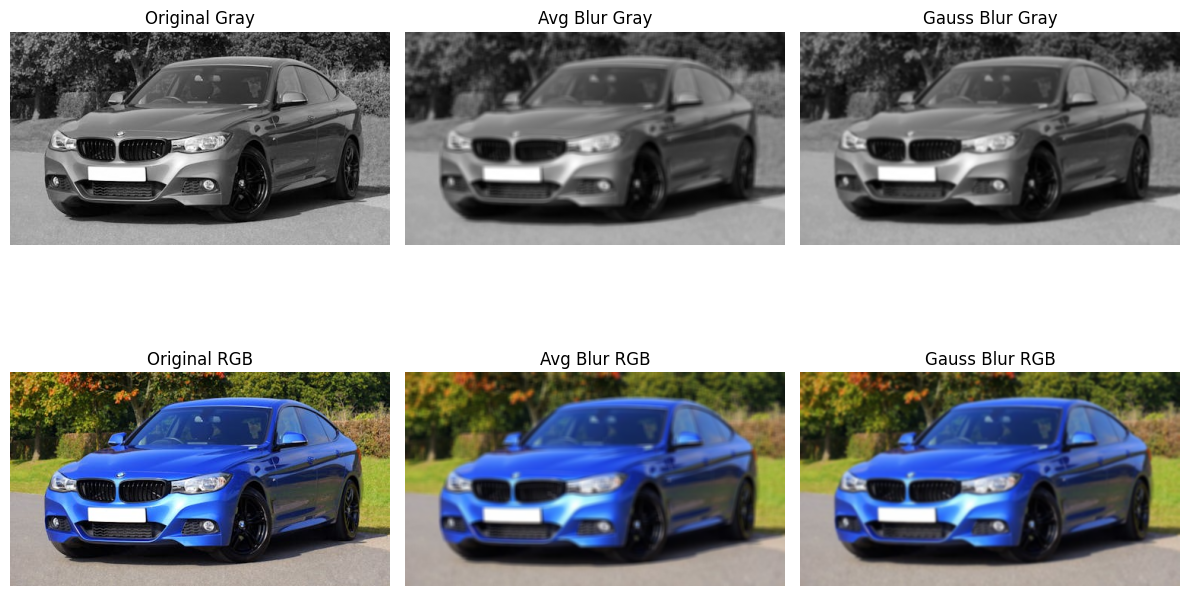

In [55]:
#Showing all the results for grayscale and rgb separately
#creating the grayscale version of the image
if img_n.ndim == 3:
    imgg = np.mean(img_n, axis=2).astype(np.uint8)
else:
    imgg = img_n
#we use kernel size = 6
ab_gray = average_blur_gray(imgg,6)
ab_rgb = average_blur_gray(img_n,6)
#applying gaussian blur
gb_gray = gaussian_blur(imgg,6,1.4)
gb_rgb = gaussian_blur(img_n,6,1.4)
plt.figure(figsize=(12, 8))
#first row: grayscale
plt.subplot(2,3,1)
plt.imshow(imgg, cmap='gray')
plt.title("Original Gray")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(ab_gray, cmap='gray')
plt.title("Avg Blur Gray")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(gb_gray, cmap='gray')
plt.title("Gauss Blur Gray")
plt.axis('off')

#second row : rgb image
plt.subplot(2,3,4)
plt.imshow(img_n)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(ab_rgb)
plt.title("Avg Blur RGB")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(gb_rgb)
plt.title("Gauss Blur RGB")
plt.axis('off')
plt.tight_layout()
plt.show()



### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

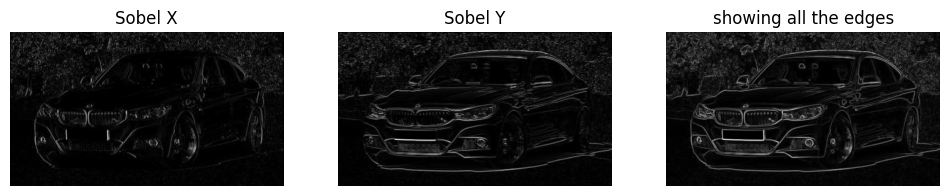

In [56]:
def sobel(img):
    #defining filter kernels
    kx =np.array([[-1,0, 1],[-2,0,2],[-1,0,1]])
    ky =np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gx = convolve(img, kx)
    gy = convolve(img, ky)
    #computing magnitude
    mag = np.sqrt(gx**2+gy**2)
    norm = (mag/np.max(mag))*255
    return norm.astype(np.uint8),gx,gy
#plotting the results
edges,gx,gy = sobel(imgg)
plt.figure(figsize=(12,4))
#showing sobel X(gx)
plt.subplot(1,3,1)
plt.imshow(np.abs(gx), cmap='gray')
plt.title("Sobel X")
plt.axis('off')

#showing sobel Y(gy)
plt.subplot(1,3,2)
plt.imshow(np.abs(gy), cmap='gray')
plt.title("Sobel Y")
plt.axis('off')

#showing all the edges
plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("showing all the edges")
plt.axis('off')

plt.show()

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [57]:
#task 1
def laplacian_sharpen(img):
    k = np.array([[0,1,0],
                  [1,-4,1],
                  [0,1,0]])
    lap = convolve(img, k)
    sharp = img - lap #taking alpha=1
    return np.clip(sharp,0,255).astype(np.uint8) #clipping in the range 0-255

In [58]:
#task-2
def unsharp_mask(img, alpha):
    blurred = gaussian_blur(img,5,1.0)
    mask = img.astype(np.float32) - blurred.astype(np.float32)
    sharp = img +alpha*mask
    return np.clip(sharp,0,255).astype(np.uint8)

0.0


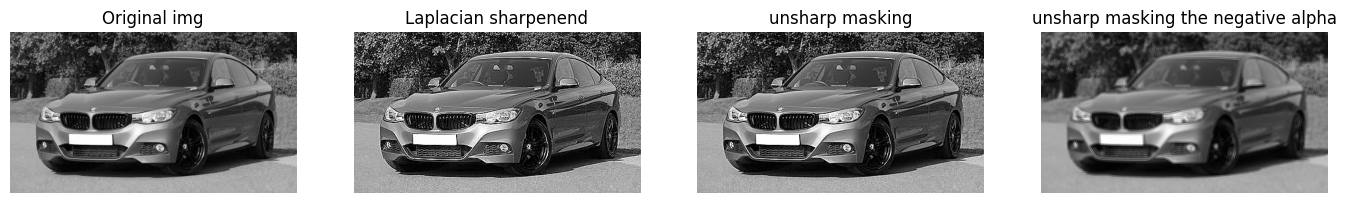

In [59]:
#showing the results
sh1 = laplacian_sharpen(imgg)
sh2 = unsharp_mask(imgg,2.0)
sh3 = unsharp_mask(imgg,-2.0)

#comparing the result from cv2 and this
k = np.array([[0,1,0], [1,-4,1],[0,1,0]])
cv_lap = cv2.filter2D(imgg, cv2.CV_32F, k)
res2 = imgg - cv_lap
res2 = np.clip(res2,0,255).astype(np.uint8)
diff = np.max(np.abs(sh1.astype(float) - res2.astype(float)))
print(diff)

plt.figure(figsize=(17, 5))
#original
plt.subplot(1,4,1)
plt.imshow(imgg, cmap='gray')
plt.title("Original img")
plt.axis('off')

#laplacian result
plt.subplot(1,4,2)
plt.imshow(sh1, cmap='gray')
plt.title("Laplacian sharpenend")
plt.axis('off')

#unsharp mask result
plt.subplot(1,4,3)
plt.imshow(sh2, cmap='gray')
plt.title("unsharp masking")
plt.axis('off')

#unsharp with negative alpha value= -2.0
#this part is giving blurred image
plt.subplot(1,4,4)
plt.imshow(sh3,cmap='gray')
plt.title("unsharp masking the negative alpha")
plt.axis('off')

plt.show()

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

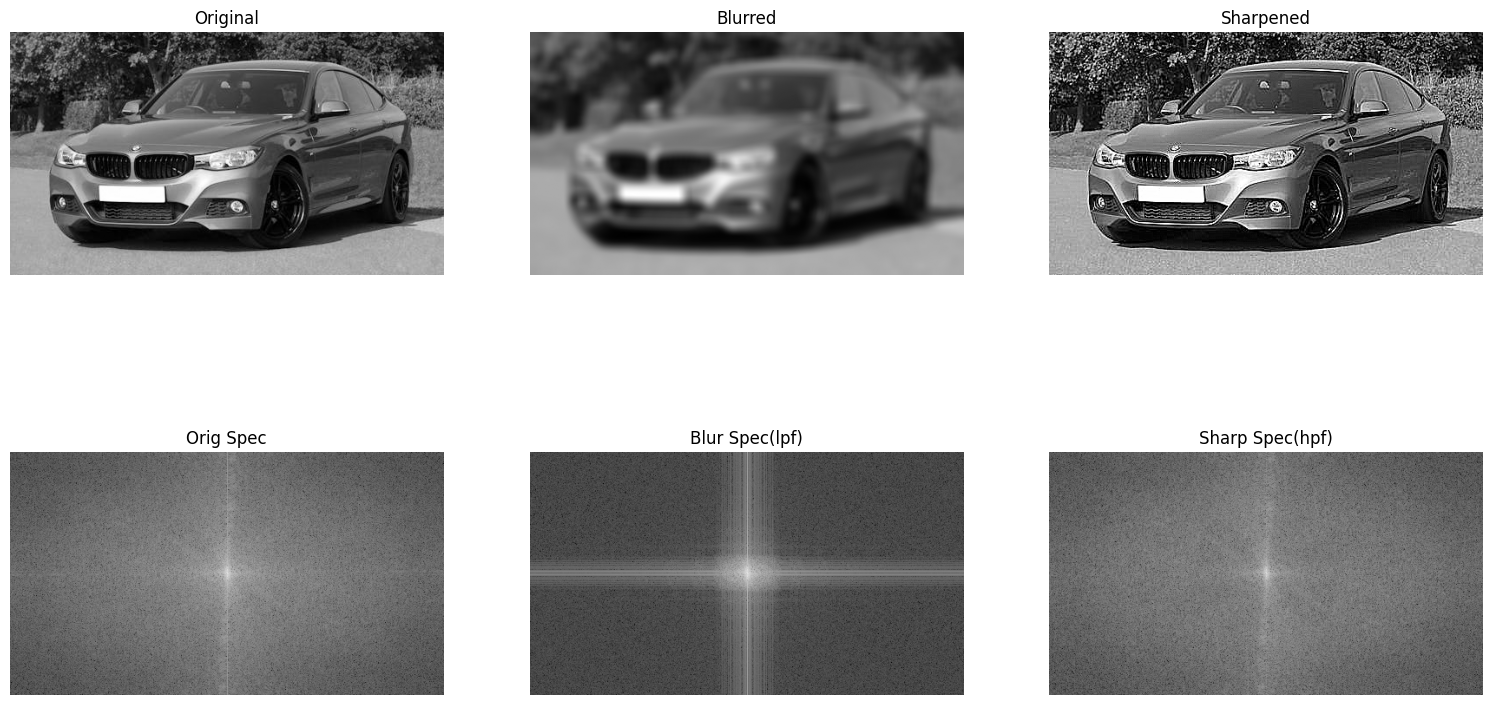

In [60]:
def getspec(img):    #defined a function to get magnitude
    f = np.fft.fft2(img)
    fs = np.fft.fftshift(f)
    mag = 20 * np.log(np.abs(fs))
    return mag

#taking ksize=15 and alpha value=3.0
im1 = imgg
im2 = gaussian_blur(imgg, 15, 5)
im3 = unsharp_mask(imgg, 3.0)
#getting magnitude specturm of images
sp1 = getspec(im1)
sp2 = getspec(im2)
sp3 = getspec(im3)

#plotting the results
plt.figure(figsize=(19,10))

plt.subplot(2,3,1)
plt.imshow(im1, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(im2, cmap='gray')
plt.title("Blurred")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(im3, cmap='gray')
plt.title("Sharpened")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(sp1, cmap='gray')
plt.title("Orig Spec")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(sp2, cmap='gray')
plt.title("Blur Spec(lpf)")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(sp3, cmap='gray')
plt.title("Sharp Spec(hpf)")
plt.axis('off')

plt.show()

#observations :-
# for lpf the outer region become darker
# for hpf the outer region becomes brighter compared to the blur spectrum

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

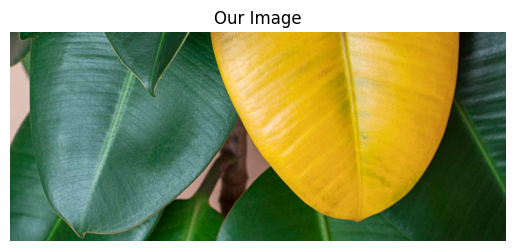

In [61]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
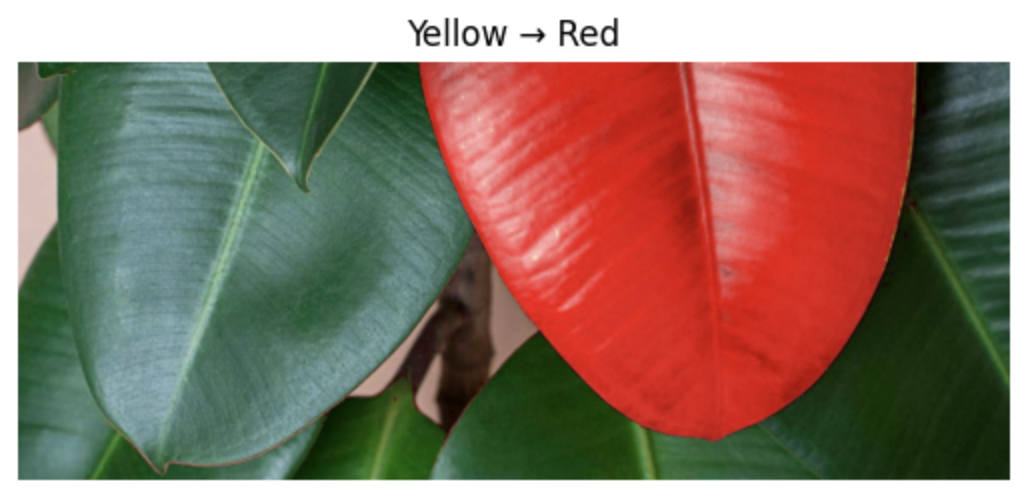

Also, we can change to a less brighter colour
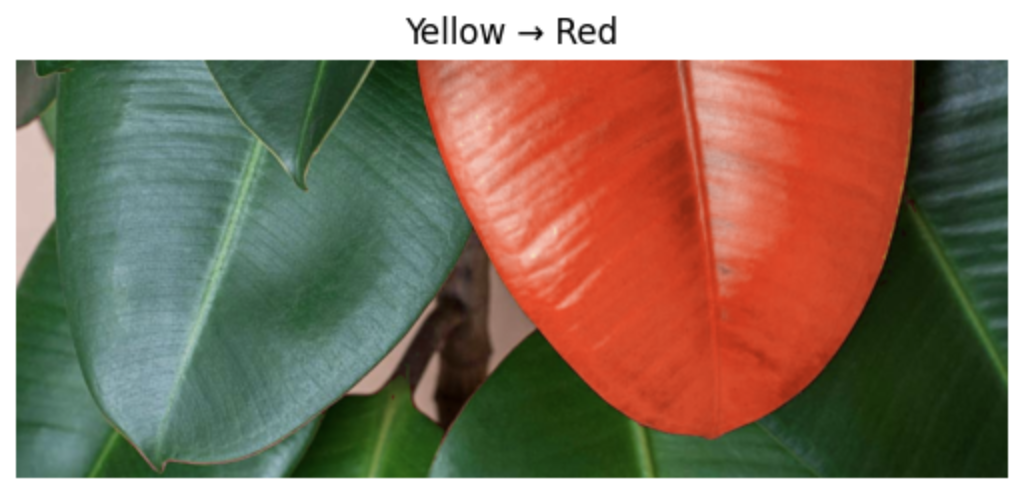

In [62]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.